### Assignment 1 -- Take home exercise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh

In [3]:
# prepare categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# data transformation
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category name
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

#### Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.


In [4]:
#Answer here
# 1. Sorting using  sort_index()
# Last to first row
print("-" * 20 + "Last to first row" + "-" * 20)
l_2_f = X.sort_index(ascending=False)
print(l_2_f)

# First to last row
print("-" * 20 + "First to last row" + "-" * 20)
f_2_l = X.sort_index(ascending=True)
print(f_2_l)

--------------------Last to first row--------------------
                                                   text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
...                                                 ...       ...   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   

               category_name  
2256                 sci.med  
2255                 sci.med  
2254                

In [5]:
# 2. query where categories are 'sci.med' or 'soc.religion.christian' and sort by category numbers
query = X.query('category in (2,3)').sort_values(by='category')
query

text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
1775  From: leisner@wrc.xerox.com (Marty Leisner 713...         2   
888   From: ls8139@albnyvms.bitnet (larry silverberg...         2   
889   From: mmatusev@radford.vak12ed.edu (Melissa N....         2   
890   From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   
...                                                 ...       ...   
981   From: erh0362@tesla.njit.edu Subject: Mormon b...         3   
986   From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
989   From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         3   
994   From: atterlep@vela.acs.oakland.edu (Cardinal ...         3   
1098  From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   

               category_name  
2256                 sci.med  
1775                 sci.med  
888                  sci.med  
889                  sci.med  
890                  sci.med  
...                      ...  
981   soc.religion.christian  
986   soc.religion.christian  
989   soc.religion.christian  
994   soc.religion.christian  
1098  soc.religion.christian  

[1193 rows x 3 columns]

In [6]:
# 3. Group by category and count the row
count_category_types = X.groupby(by=['category', 'category_name'], group_keys=True).count().sort_values(by=['text'],
                                                                                                        ascending=False)
count_category_types

text
category category_name               
3        soc.religion.christian   599
2        sci.med                  594
1        comp.graphics            584
0        alt.atheism              480

In [7]:
# 4. Calculate statistic values
print("average records per category: ", count_category_types['text'].mean())
print("median records per category: ", count_category_types['text'].median())
print("max records among categories: ", count_category_types['text'].min())
print("min records among categories: ", count_category_types['text'].max())

average records per category:  564.25
median records per category:  589.0
max records among categories:  480
min records among categories:  599


#### Exercise 5
Please check the data and the process below, describe what you observe and why it happened.
$Hint$ :  why `.isnull()` didn't work?

In [8]:
NA_dict = [{'id': 'A', 'missing_example': np.nan},
           {'id': 'B'},
           {'id': 'C', 'missing_example': 'NaN'},
           {'id': 'D', 'missing_example': 'None'},
           {'id': 'E', 'missing_example': None},
           {'id': 'F', 'missing_example': ''}]

NA_df = pd.DataFrame(NA_dict, columns=['id', 'missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Exercise 5 - Answer
According to the pandas document on how to use .isnull(). The function check if the attributes contain data type NaN, None, and NaT, if so it then returns True.
- If we see data of the ids (C, D, and F), isnull() returns False, because they are values declared inside the single quote ('') which indicate that they are type string.

Then ids A, B and E are false, the reason are as follows:
1. For the id ‘A’, if we look up into the declaration of np.nan. It is actually equal to NaN.
2. For the id ‘B’, it doesn’t have an attribute missing_example. It returns nothing when trying to get the value. Isnull() treats it as a None.
3. And for the id ‘E’, for sure, is type None.

----

#### Exercise 6
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [11]:
# 1st test: random without setting random_state
X_sample = X.sample(n=1000)
len(X_sample)
X_sample[0:10]

text  category  \
1716  From: calzone@athena.mit.edu Subject: Re: Eume...         2   
658   From: mussack@austin.ibm.com (Christopher Muss...         3   
1908  From: geoffrey@cosc.canterbury.ac.nz (Geoff Th...         1   
1255  From: fulk@cs.rochester.edu (Mark Fulk) Subjec...         2   
386   From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
1318  From: robg@citr.uq.oz.au (Rob Geraghty) Subjec...         2   
394   From: kardank@ERE.UMontreal.CA (Kardan Kaveh) ...         1   
2172  From: lmp8913@rigel.tamu.edu (PRESTON, LISA M)...         1   
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1944  From: aron@tikal.ced.berkeley.edu (Aron Bonar)...         1   

               category_name  
1716                 sci.med  
658   soc.religion.christian  
1908           comp.graphics  
1255                 sci.med  
386              alt.atheism  
1318                 sci.med  
394            comp.graphics  
2172           comp.graphics  
0              comp.graphics  
1944           comp.graphics

In [12]:
# 2nd test: random with setting random_state
X_sample = X.sample(n=1000, random_state=1)
X_sample[0:10]

text  category  \
367   From: echen@burn.ee.washington.edu (Ed Chen) S...         1   
2108  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
2170  From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...         0   
1776  From: whheydt@pbhya.pacbell.com (Wilson Heydt)...         3   
1335  From: Petch@gvg47.gvg.tek.com (Chuck Petch) Su...         3   
1271  From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
1555  From: marka@hcx1.ssd.csd.harris.com (Mark Ashl...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
1479  From: armstrng@cs.dal.ca (Stan Armstrong) Subj...         3   
1027  From: csc3phx@vaxa.hofstra.edu Subject: Loosin...         1   

               category_name  
367            comp.graphics  
2108             alt.atheism  
2170             alt.atheism  
1776  soc.religion.christian  
1335  soc.religion.christian  
1271             alt.atheism  
1555  soc.religion.christian  
2247  soc.religion.christian  
1479  soc.religion.christian  
1027           comp.graphics

In [13]:
# 3rd test: without setting random_state again
X_sample = X.sample(n=1000)
X_sample[0:10]

text  category  \
1469  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran) S...         1   
325   From: kuryakin@bcstec.ca.boeing.com (Rick Pave...         1   
1626  From: jmcocker@eos.ncsu.edu (Mitch) Subject: R...         1   
2055  From: davel@davelpcSanDiego.NCR.com (Dave Lord...         2   
1015  From: orourke@sophia.smith.edu (Joseph O'Rourk...         1   
1427  From: jcopelan@nyx.cs.du.edu (The One and Only...         0   
1145  From: ferdinan@oeinck.waterland.wlink.nl (Ferd...         1   
214   From: pmoloney@maths.tcd.ie (Paul Moloney) Sub...         3   
31    From:  (Phil Bowermaster) Subject: C. S. Lewis...         3   
275   From: dozonoff@bu.edu (david ozonoff) Subject:...         2   

               category_name  
1469           comp.graphics  
325            comp.graphics  
1626           comp.graphics  
2055                 sci.med  
1015           comp.graphics  
1427             alt.atheism  
1145           comp.graphics  
214   soc.religion.christian  
31    soc.religion.christian  
275                  sci.med

In [14]:
# 4th test: with setting random_state again
X_sample = X.sample(n=1000, random_state=1)
X_sample[0:10]

text  category  \
367   From: echen@burn.ee.washington.edu (Ed Chen) S...         1   
2108  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
2170  From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...         0   
1776  From: whheydt@pbhya.pacbell.com (Wilson Heydt)...         3   
1335  From: Petch@gvg47.gvg.tek.com (Chuck Petch) Su...         3   
1271  From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
1555  From: marka@hcx1.ssd.csd.harris.com (Mark Ashl...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
1479  From: armstrng@cs.dal.ca (Stan Armstrong) Subj...         3   
1027  From: csc3phx@vaxa.hofstra.edu Subject: Loosin...         1   

               category_name  
367            comp.graphics  
2108             alt.atheism  
2170             alt.atheism  
1776  soc.religion.christian  
1335  soc.religion.christian  
1271             alt.atheism  
1555  soc.religion.christian  
2247  soc.religion.christian  
1479  soc.religion.christian  
1027           comp.graphics

#### Exercise 6 Answer
Once the sample() was executed, the value of the data list will be random. We can see from the indexes in the X_sample that were changed from the numerical sequence into non-sequence. But there the case when we set random_state value differently.
1. Result with undefined number to random_state argument
- The sample_output will be random everytime the code was executed.
2. Result with any number to random_state argument
- The sample output will remain the same as the first random result was shown.

#### Exercise 10
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary? Try to do this as efficient as possible.

---

In [15]:
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [16]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
feature_names = count_vect.get_feature_names_out()

In [17]:
print(count_vect.get_feature_names_out())

['00' '000' '0000' ... 'zzz' 'ªl' 'íålittin']


In [18]:
# Answer here
arr = np.array(X_counts[4, :100].toarray())
search = np.where(arr == 1)
for result in search:
    print("index:", result[1], " value:", feature_names[result[1]])

index: 0  value: 00
index: 37  value: 01


---

### Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix.

By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram.

As an exercise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

How would you do this efficiently? Remember there is a lot of words in the vocab.

Report below what methods you would use to get a nice and useful visualization.

---

In [19]:
# Answer here
# To be able to represent the documents without defining a huge sparse matrix.
# The documents can be stored as sequences. So texts to sequence technique is used here utilizing Tokenizer from keras.
# First, the documents are stored in the tokenizer. So then the sequences can be retrieved

from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(X.text)

text_encoded_phrase = tok.texts_to_sequences(X.text)

In [20]:
# After defining the document sequences we can use it as a index to refer to the word.
text_to_sequence_result = ""
for sequence in text_encoded_phrase[0]:
    text_to_sequence_result = text_to_sequence_result + " " + tok.index_word[sequence]
print("text_to_sequence_result:\n", text_to_sequence_result)
print("-" * 100)
print("original text:\n", X.text[0])

text_to_sequence_result:
  from sd345 city ac uk michael collier subject converting images to hp laserjet iii nntp posting host hampton organization the city university lines 14 does anyone know of a good way standard pc application pd utility to convert tif img tga files into laserjet iii format we would also like to do the same converting to hpgl hp plotter files please email any response is this the correct group thanks in advance michael michael collier programmer the computer unit email m p collier uk ac city the city university tel 071 477 8000 x3769 london fax 071 477 8565 ec1v 0hb
----------------------------------------------------------------------------------------------------
original text:
 From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We 

---

#### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

X_3d_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [22]:
view_points = [(1, -120), (-140, 10), (20, -120)]
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize=(24, 24))

for index, view in enumerate(view_points):
    for c, category in zip(col, categories):
        xs = X_3d_reduced[X['category_name'] == category].T[0]
        ys = X_3d_reduced[X['category_name'] == category].T[1]
        zs = X_3d_reduced[X['category_name'] == category].T[2]
        ax = plt.subplot(1, 3, index + 1, projection='3d')
        ax.set_xlabel('\nX Label')
        ax.set_ylabel('\nY Label')
        ax.set_zlabel('\nZ Label')
        ax.view_init(view[0], view[1])
        ax.grid(color='grey', linestyle=':', linewidth=1, alpha=0.2)
        ax.scatter(xs, ys, zs, cmap=c, marker='o')

---

#### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.
Tips:


(-0.5, 399.5, 199.5, -0.5)

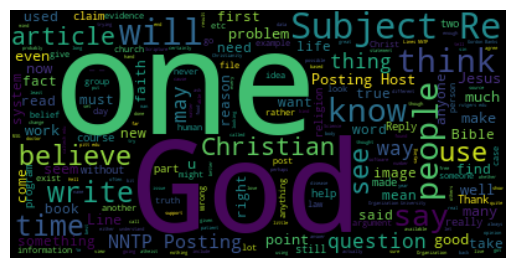

In [23]:
# Use wordcloud to represent the mostly used words
from wordcloud import WordCloud

wordcloud = WordCloud().generate(" ".join(list(X.text)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [24]:
import copy

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
word_df = pd.DataFrame(copy.deepcopy(count_vect.get_feature_names_out()))
word_df.insert(len(word_df.columns), "frequency", pd.DataFrame(term_frequencies), True)
word_df = word_df.sort_values("frequency", ascending=False)
word_df = word_df.rename(columns={0: "word"})

N = 20
display = word_df[:N]

([<matplotlib.patches.Wedge at 0x2a36b4d30>,
 [Text(0.9506712767638729, 0.5533752104459939, 'the'),
  Text(0.22324711434332176, 1.0771075739857092, 'of'),
  Text(-0.4406426416333931, 1.0078859371845335, 'to'),
  Text(-0.89258741373716, 0.642874566955334, 'and'),
  Text(-1.0830165937729543, 0.19254884474446396, 'is'),
  Text(-1.06830887880349, -0.26213763459226974, 'in'),
  Text(-0.8897610037173607, -0.6467807636779833, 'that'),
  Text(-0.624200311627189, -0.9057449811975335, 'it'),
  Text(-0.372317976963813, -1.0350745499864122, 'you'),
  Text(-0.14378929660849576, -1.0905616159487892, 'for'),
  Text(0.07440624684596339, -1.0974806196148967, 'not'),
  Text(0.2727738577742756, -1.065642727425538, 'this'),
  Text(0.4552033264535952, -1.0013939941829, 'be'),
  Text(0.6205772759417266, -0.9082311625267799, 'from'),
  Text(0.7656747731716108, -0.7897734749462041, 'are'),
  Text(0.8862498656149489, -0.6515835907214708, 'edu'),
  Text(0.9773196527859319, -0.5048230346154837, 'have'),
  Text(1

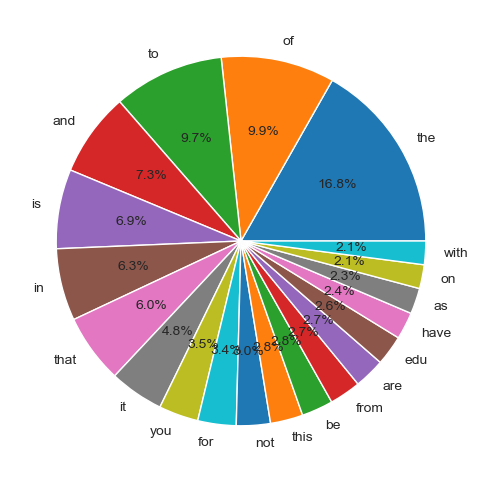

In [25]:
# pie graph

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(display.frequency[:N], labels=display.word[:N], autopct='%.1f%%')

In [26]:
# scatter graph
display.plot(kind='scatter', x='word', y='frequency',
             title='Word Frequency', s=0.9)

<AxesSubplot:title={'center':'Word Frequency'}, xlabel='word', ylabel='frequency'>

In [27]:
# histogram
display.plot(kind='hist', x='word', y='frequency',
             title='Word Frequency')

<AxesSubplot:title={'center':'Word Frequency'}, ylabel='Frequency'>

### Topic Modeling
In order to derive meaningful visualization, LDA topic model can be utilized to see the insight information.
The LDA topic model using `LdaModel()`, we need the corpus and dictionary. Let’s create them first and then build the model.

### Tokenize Sentences and Clean
Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using `simple_preprocess()`
and build bigram, trigram models and lemmatize (declare in the `data_mining_helpers.py`).

Lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

Keep only these POS tags because they are the ones contributing the most to the meaning of the sentences


In [28]:
data = X.text.values.tolist()
data_words = list(dmh.sent_to_words(data))

In [29]:
data_ready = dmh.process_words(data_words)  # processed Text Data!

In [30]:
len(data_ready)

2257

In [31]:
import gensim
from gensim import corpora

# Create Dictionary
id2word = corpora.Dictionary(data_ready)
print(id2word)

Dictionary<17718 unique tokens: ['advance', 'application', 'computer', 'convert', 'correct']...>


In [32]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [33]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [34]:
len(id2word)

17718

The trained topics (keywords and weights) are printed below as well.
If we examine topic keywords, they are nicely segregate and collectively represent the topics we initially chose: atheism, religion, graphics and med.

In [35]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=len(categories),
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)
lda_model.print_topics()

[(0,
  '0.009*"exist" + 0.009*"view" + 0.008*"science" + 0.008*"belief" + 0.008*"atheist" + 0.008*"human" + 0.007*"true" + 0.007*"different" + 0.007*"nature" + 0.007*"meeting"'),
 (1,
  '0.015*"line" + 0.011*"information" + 0.010*"info" + 0.009*"thank" + 0.008*"help" + 0.008*"mail" + 0.008*"keyboard" + 0.008*"file" + 0.007*"need" + 0.007*"subject"'),
 (2,
  '0.013*"doctor" + 0.010*"muscle" + 0.008*"injury" + 0.008*"treatment" + 0.006*"article" + 0.006*"type" + 0.006*"blood" + 0.006*"condition" + 0.006*"normal" + 0.005*"body"'),
 (3,
  '0.015*"write" + 0.013*"people" + 0.013*"think" + 0.011*"line" + 0.011*"know" + 0.010*"subject" + 0.009*"thing" + 0.008*"time" + 0.008*"article" + 0.008*"way"')]

### Find The Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

In [36]:
df_topic_sents_keywords = dmh.format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_topic_sents_keywords

/Users/kneskung/DataspellProjects/DM Class/DM2022-Lab1-Homework/helpers/data_mining_helpers.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(
/Users/kneskung/DataspellProjects/DM Class/DM2022-Lab1-Homework/helpers/data_mining_helpers.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


Dominant_Topic  Percentage_Contribution  \
0                  1                   0.9739   
1                  1                   0.5356   
2                  3                   0.6293   
3                  3                   0.7211   
4                  3                   0.8284   
...              ...                      ...   
2252               1                   0.7997   
2253               2                   0.3507   
2254               3                   0.4723   
2255               1                   0.4156   
2256               3                   0.4358   

                                         Topic_Keywords  \
0     line, information, info, thank, help, mail, ke...   
1     line, information, info, thank, help, mail, ke...   
2     write, people, think, line, know, subject, thi...   
3     write, people, think, line, know, subject, thi...   
4     write, people, think, line, know, subject, thi...   
...                                                 ...   
2252  line, information, info, thank, help, mail, ke...   
2253  doctor, muscle, injury, treatment, article, ty...   
2254  write, people, think, line, know, subject, thi...   
2255  line, information, info, thank, help, mail, ke...   
2256  write, people, think, line, know, subject, thi...   

                                                      0  
0     [subject, convert, image, laserjet, line, know...  
1     [deglurkar, subject, help, splitting, trim, re...  
2     [harrasse, work, use, prayer, line, ill, email...  
3     [zwart, subject, organization, line, write, pa...  
4     [stanly, subject, eld, brother, line, article,...  
...                                                 ...  
2252  [christophe, want, rat, cell, line, cortical, ...  
2253  [subject, transplant, recipient, dinternationa...  
2254  [subject, jigger, theseus_unx, line, world, gr...  
2255  [subject, faq, typing_injurie, general, info, ...  
2256  [steve_dy, subject, organization, line, articl...  

[2257 rows x 4 columns]

In [37]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.9739   
1            1               1              0.5356   
2            2               3              0.6293   
3            3               3              0.7211   
4            4               3              0.8284   
5            5               3              0.8434   
6            6               3              0.9148   
7            7               2              0.6002   
8            8               3              0.3957   
9            9               3              0.6992   

                                            Keywords  \
0  line, information, info, thank, help, mail, ke...   
1  line, information, info, thank, help, mail, ke...   
2  write, people, think, line, know, subject, thi...   
3  write, people, think, line, know, subject, thi...   
4  write, people, think, line, know, subject, thi...   
5  write, people, think, line, know, subject, thi...   
6  write, people, think, line, know, subject, thi...   
7  doctor, muscle, injury, treatment, article, ty...   
8  write, people, think, line, know, subject, thi...   
9  write, people, think, line, know, subject, thi...   

                                                Text  
0  [subject, convert, image, laserjet, line, know...  
1  [deglurkar, subject, help, splitting, trim, re...  
2  [harrasse, work, use, prayer, line, ill, email...  
3  [zwart, subject, organization, line, write, pa...  
4  [stanly, subject, eld, brother, line, article,...  
5  [virgilio_dean, velasco_jr, subject, arrogance...  
6  [subject, anger, organization, article, write,...  
7  [teenage, acne, organization, line, churchill,...  
8  [reply, univ, line, article, write, write, exp...  
9  [need, advice, doctor, patient, relationship, ...

#### The most representative sentence for each topic
Samples of sentences that most represent a given topic.

In [38]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Percentage_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percentage_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Percentage_Contrib  \
0          0                    0.6921   
1          1                    0.9865   
2          2                    0.9496   
3          3                    0.9901   

                                                                           Keywords  \
0    exist, view, science, belief, atheist, human, true, different, nature, meeting   
1         line, information, info, thank, help, mail, keyboard, file, need, subject   
2  doctor, muscle, injury, treatment, article, type, blood, condition, normal, body   
3              write, people, think, line, know, subject, thing, time, article, way   

                                                                                   Representative Text  
0  [benediktine, metaphysic, line, write, great, authority, contradictory, exist, contradictory, pr...  
1  [driver, line, write, write, require, driver, super_vga, display, display, know, obtain, relevan...  
2  [subject, keyword, host, jeeve, ucsd_edu, hear, epileptic, patient, seizure, eat, msg, add, exci...  
3  [subject, host_punisher, caltech_edu, ken_arromdee, write, look, nazi, comparison, people, compa...

### Frequency Distribution of Word Counts in Documents
When working with a large number of documents, you want to know how big the documents are as a whole and by topic.

In [39]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
doc_lens

[29,
 63,
 191,
 30,
 49,
 84,
 86,
 186,
 42,
 171,
 239,
 54,
 273,
 26,
 44,
 32,
 53,
 7,
 22,
 36,
 33,
 108,
 53,
 11,
 96,
 55,
 9,
 52,
 78,
 36,
 143,
 126,
 94,
 107,
 96,
 15,
 70,
 130,
 242,
 24,
 21,
 40,
 16,
 50,
 117,
 119,
 29,
 30,
 49,
 63,
 110,
 60,
 34,
 64,
 320,
 24,
 301,
 154,
 52,
 57,
 33,
 21,
 23,
 70,
 33,
 67,
 69,
 24,
 101,
 40,
 102,
 41,
 42,
 37,
 172,
 30,
 78,
 69,
 162,
 13,
 97,
 82,
 104,
 51,
 16,
 43,
 62,
 58,
 16,
 43,
 48,
 28,
 25,
 58,
 108,
 32,
 12,
 268,
 32,
 28,
 93,
 74,
 98,
 42,
 177,
 150,
 76,
 94,
 280,
 33,
 155,
 106,
 105,
 148,
 41,
 40,
 18,
 36,
 45,
 59,
 135,
 60,
 98,
 1643,
 62,
 45,
 56,
 118,
 57,
 108,
 24,
 22,
 40,
 127,
 32,
 458,
 86,
 45,
 80,
 53,
 23,
 24,
 234,
 39,
 49,
 54,
 7,
 72,
 107,
 25,
 113,
 49,
 123,
 154,
 166,
 15,
 183,
 25,
 123,
 657,
 84,
 39,
 50,
 39,
 48,
 70,
 49,
 73,
 46,
 47,
 90,
 164,
 70,
 107,
 17,
 96,
 41,
 148,
 599,
 137,
 94,
 114,
 80,
 7,
 95,
 114,
 331,
 19,
 241,
 35

In [40]:
plt.figure(figsize=(16, 7), dpi=160)
plt.hist(doc_lens, bins=1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0, 1000, 9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))

Text(0.5, 1.0, 'Distribution of Document Word Counts')

In [41]:
import seaborn as sns
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2, 2, figsize=(16, 14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins=1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: ' + str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0, 1000, 9))
plt.ylabel(["a", "b", "c", "d"])
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)

Text(0.5, 0.98, 'Distribution of Document Word Counts by Dominant Topic')

### Word Clouds of Top N Keywords in Each Topic
We have already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics have been taken here is followed in the subsequent plots as well.

In [42]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

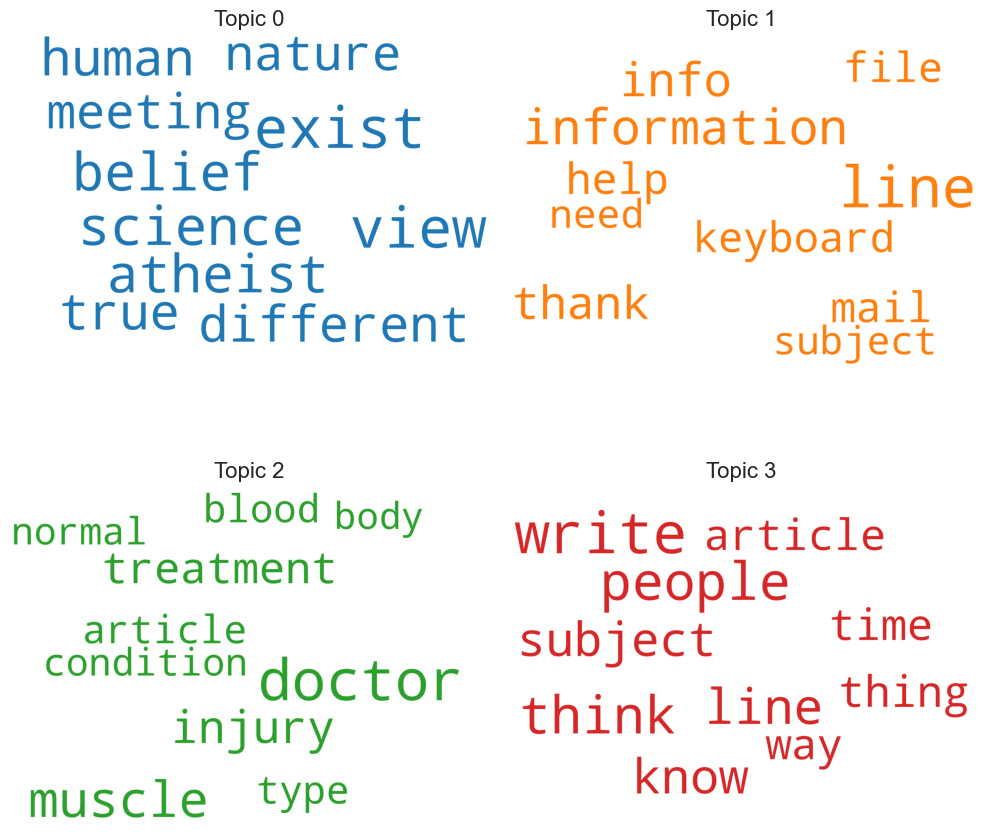

In [43]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight.

Often such words turn out to be less important. The chart have been drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [44]:
from collections import Counter

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

In [45]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i, weight, counter[word]])
out

[['exist', 0, 0.009467493, 520],
 ['view', 0, 0.009193326, 389],
 ['science', 0, 0.008319432, 340],
 ['belief', 0, 0.008001126, 409],
 ['atheist', 0, 0.007957076, 479],
 ['human', 0, 0.0075793155, 382],
 ['true', 0, 0.00722628, 502],
 ['different', 0, 0.0072171055, 392],
 ['nature', 0, 0.0068185125, 187],
 ['meeting', 0, 0.0067681787, 40],
 ['line', 1, 0.0152198365, 1998],
 ['information', 1, 0.010970686, 433],
 ['info', 1, 0.009873022, 206],
 ['thank', 1, 0.009495179, 406],
 ['help', 1, 0.008295951, 529],
 ['mail', 1, 0.007988224, 320],
 ['keyboard', 1, 0.007928939, 81],
 ['file', 1, 0.0077268486, 511],
 ['need', 1, 0.0069347997, 657],
 ['subject', 1, 0.0068969433, 1541],
 ['doctor', 2, 0.013356404, 268],
 ['muscle', 2, 0.00998476, 50],
 ['injury', 2, 0.008187153, 31],
 ['treatment', 2, 0.0075278087, 186],
 ['article', 2, 0.0060292636, 1271],
 ['type', 2, 0.005999339, 251],
 ['blood', 2, 0.0059581506, 122],
 ['condition', 2, 0.005723943, 95],
 ['normal', 2, 0.0056834733, 127],
 ['body

In [46]:
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
df

word  topic_id  importance  word_count
0         exist         0    0.009467         520
1          view         0    0.009193         389
2       science         0    0.008319         340
3        belief         0    0.008001         409
4       atheist         0    0.007957         479
5         human         0    0.007579         382
6          true         0    0.007226         502
7     different         0    0.007217         392
8        nature         0    0.006819         187
9       meeting         0    0.006768          40
10         line         1    0.015220        1998
11  information         1    0.010971         433
12         info         1    0.009873         206
13        thank         1    0.009495         406
14         help         1    0.008296         529
15         mail         1    0.007988         320
16     keyboard         1    0.007929          81
17         file         1    0.007727         511
18         need         1    0.006935         657
19      subject         1    0.006897        1541
20       doctor         2    0.013356         268
21       muscle         2    0.009985          50
22       injury         2    0.008187          31
23    treatment         2    0.007528         186
24      article         2    0.006029        1271
25         type         2    0.005999         251
26        blood         2    0.005958         122
27    condition         2    0.005724          95
28       normal         2    0.005683         127
29         body         2    0.005491         260
30        write         3    0.015214        2211
31       people         3    0.012883        1589
32        think         3    0.012567        1523
33         line         3    0.011061        1998
34         know         3    0.010595        1618
35      subject         3    0.010167        1541
36        thing         3    0.008520         934
37         time         3    0.008482        1085
38      article         3    0.008427        1271
39          way         3    0.008222         759

In [47]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.5, alpha=0.3,
           label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.2,
                label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030);
    ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
    ax.legend(loc='upper left');
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)

/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3938276376.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3938276376.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3938276376.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3938276376.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizonta

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

#### Sentence Chart Colored by Topic
Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [48]:
from matplotlib.patches import Rectangle

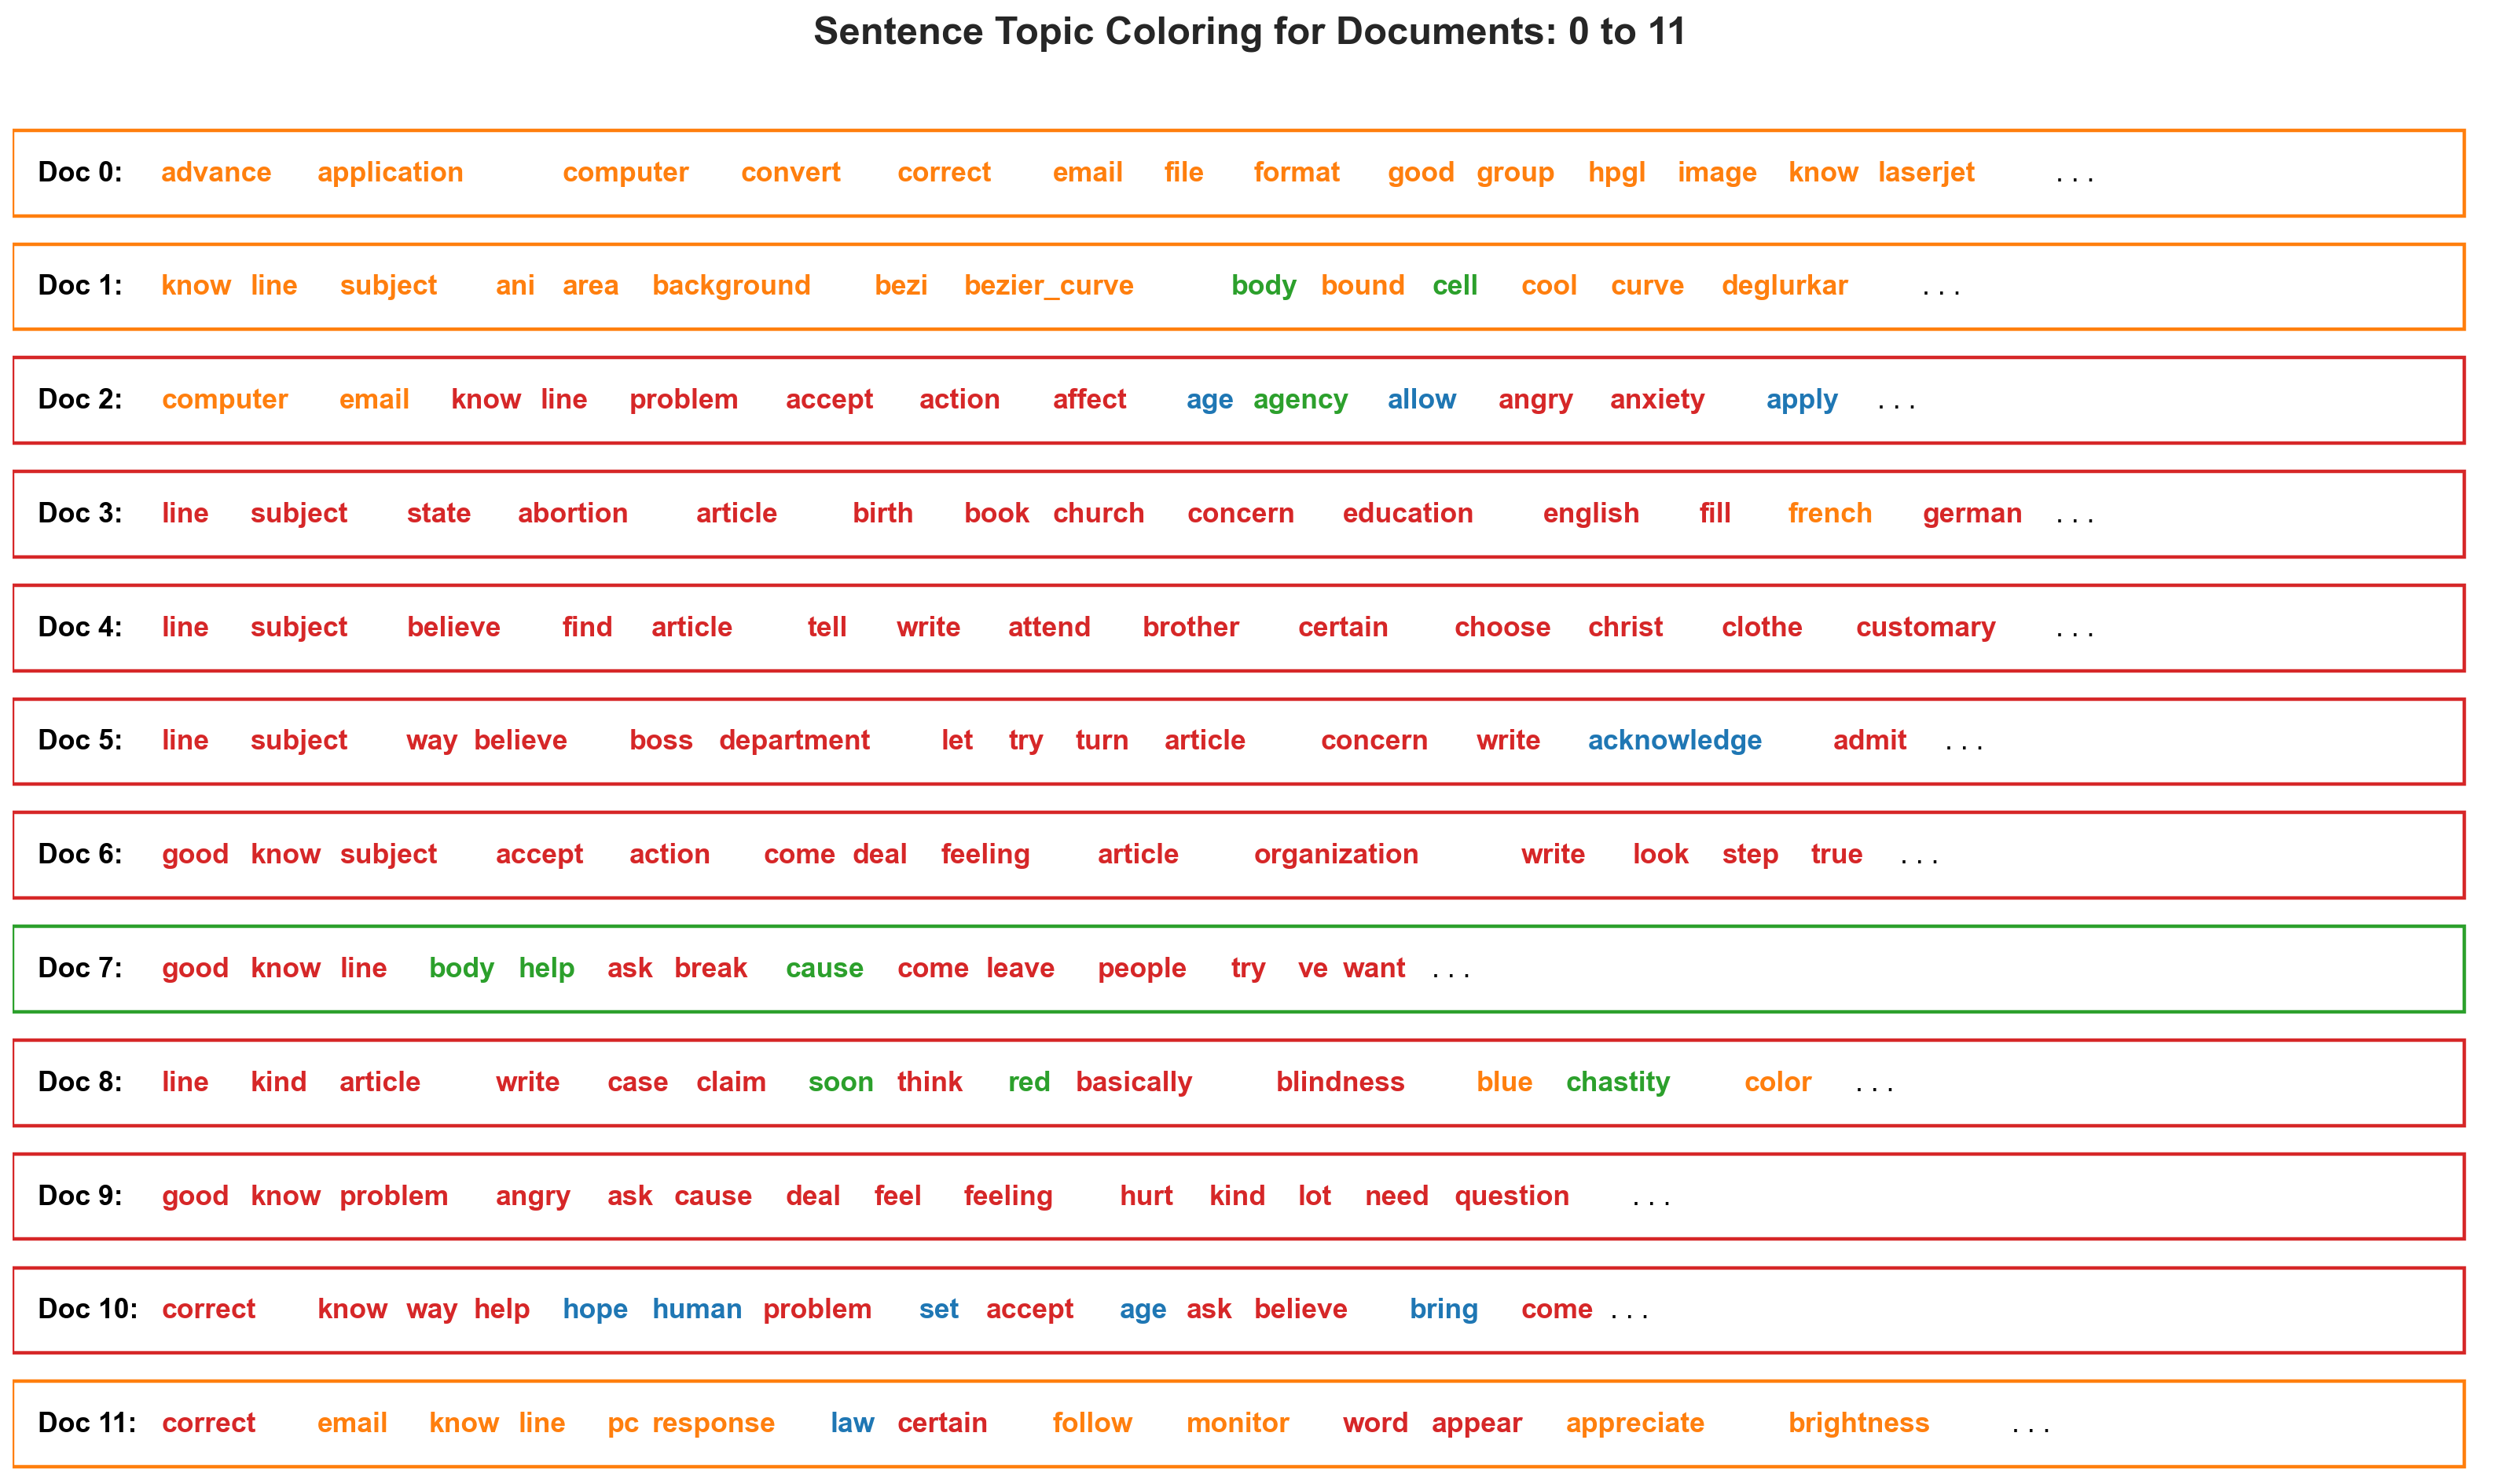

In [49]:
def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end - start, 1, figsize=(20, (end - start) * 0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i - 1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i - 1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end - 2), fontsize=22, y=0.95,
                 fontweight=700)
    plt.tight_layout()
    plt.show()


sentences_chart()

In [50]:
dominant_topics, topic_percentages = dmh.topics_per_document(model=lda_model, corpus=corpus, end=-1)

### What are the most discussed topics in the documents?
Let’s compute the total number of documents attributed to each topic.

In [51]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [52]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                   for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0, inplace=True)

- The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
- The number of documents for each topic by summing up the actual weight contribution of each topic to respective documents.

Text(0.5, 1.0, 'Number of Documents by Topic Weightage')

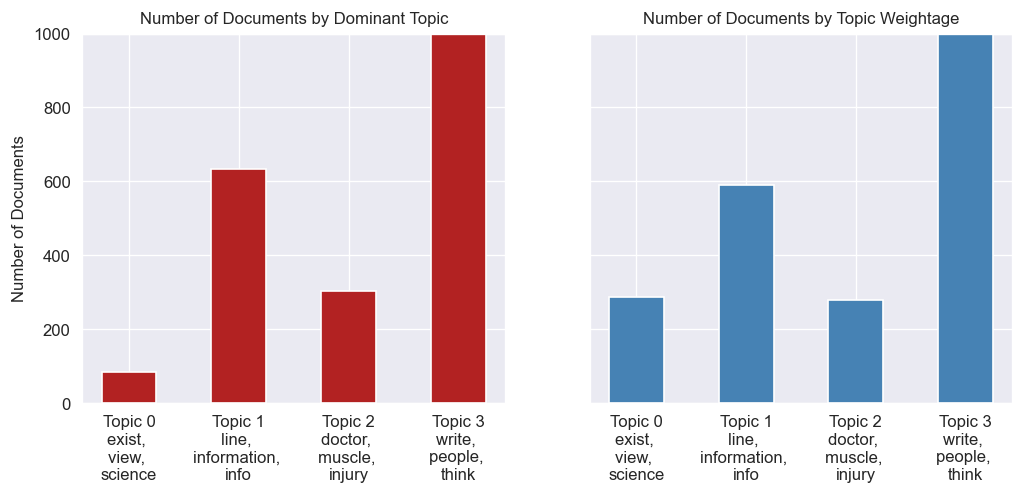

In [53]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(
    lambda x, pos: 'Topic ' + str(x) + '\n' + df_top3words.loc[df_top3words.topic_id == x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

###  t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [54]:
# Get topic weights and dominant topics
# --------------------------------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [55]:
# Get topic weights of each word in the corpus
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=1, init='pca', perplexity=30, n_iter=3000)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4

TABLEAU_COLORS = {
    'tab:gray': '#7f7f7f',
    'tab:orange': '#ff7f0e',
    'tab:red': '#d62728',
    'tab:pink': '#e377c2'
}
mycolors = np.array([color for name, color in TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[topic_num])
show(plot)

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2250 samples in 0.001s...
[t-SNE] Computed neighbors for 2250 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2250
[t-SNE] Computed conditional probabilities for sample 2000 / 2250
[t-SNE] Computed conditional probabilities for sample 2250 / 2250
[t-SNE] Mean sigma: 0.035783
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.389374
[t-SNE] KL divergence after 3000 iterations: 0.443475


Loading BokehJS ...

In [56]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alt

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.204701 -0.172316       1        1  49.185554
1     -0.102018  0.059923       2        1  22.201118
0      0.269914 -0.142838       3        1  16.275618
2      0.036805  0.255231       4        1  12.337710, topic_info=             Term         Freq        Total Category  logprob  loglift
160        people  1457.000000  1457.000000  Default  30.0000  30.0000
356         think  1421.000000  1421.000000  Default  29.0000  29.0000
822   information   560.000000   560.000000  Default  28.0000  28.0000
276        doctor   379.000000   379.000000  Default  27.0000  27.0000
1804         info   504.000000   504.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1835        study   109.748693   242.898448   Topic4  -5.5548   1.2981
201          year   105.998902   497.095598   Topic4  -5.5895   0.5472
192           use   106.596243   632.519290   Topic4  -5.5839   0.3118
435       product    98.855995   263.442726   Topic4  -5.6593   1.1123
50        problem   100.501284   679.118768   Topic4  -5.6428   0.1819

[237 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2205      1  0.033209  abstinence
2205      2  0.011070  abstinence
2205      4  0.951993  abstinence
68        1  0.515504      accept
68        3  0.484175      accept
...     ...       ...         ...
226       2  0.144876       write
226       4  0.021320       write
309       1  0.996138       wrong
201       1  0.786569        year
201       4  0.213239        year

[297 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

---

#### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

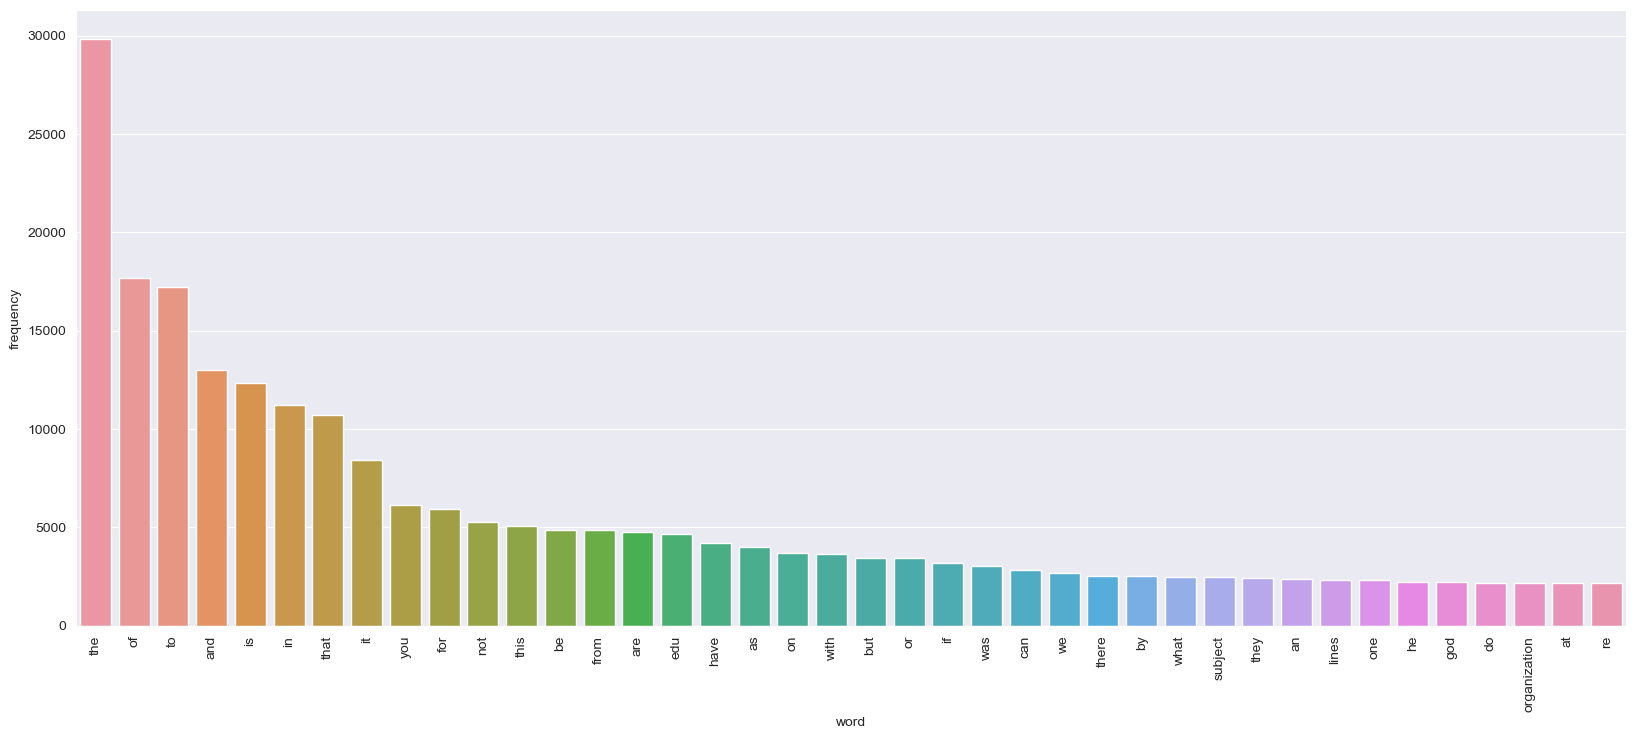

In [57]:
# Answer here
# 1 set the size
N = 40
display = word_df[:N]
plt.subplots(figsize=(N / 2, N / 5))
# 2 set value to axis x and y
g = sns.barplot(x=display.word,
                y=display.frequency)

# 3 set label to axis x and y
g.set_xticklabels(display.word, rotation=90);

In [58]:
import seaborn as sns
from nltk.tokenize import word_tokenize
import re

N = 50
display = word_df[:N]
word_list = list(X.text)[:N]
word_sequence = []
plot_y = [str(i) for i in display.word[0:N]]
plot_x = ["doc_" + str(i) for i in range(N)]
plot_z = []

for term in plot_y:
    doc_representation = []
    for doc in word_list:
        # example = "I, like, that, you, like, me, too!"
        frequencies = word_tokenize(doc.lower())
        doc_representation.append(frequencies.count(term))
    plot_z.append(doc_representation)

In [59]:
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

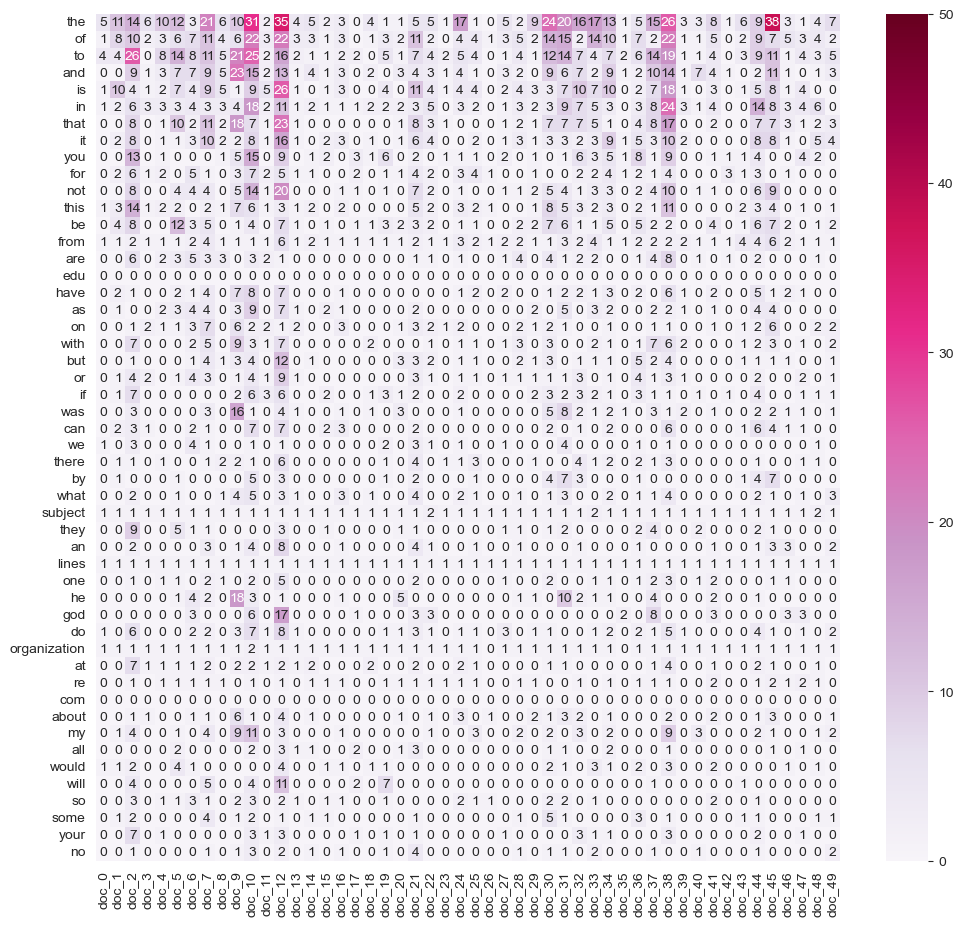

In [60]:
plt.subplots(figsize=(12, 11))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=50, annot=True)

In [61]:
# word_list[4]
len(re.findall("the", word_list[4]))

19

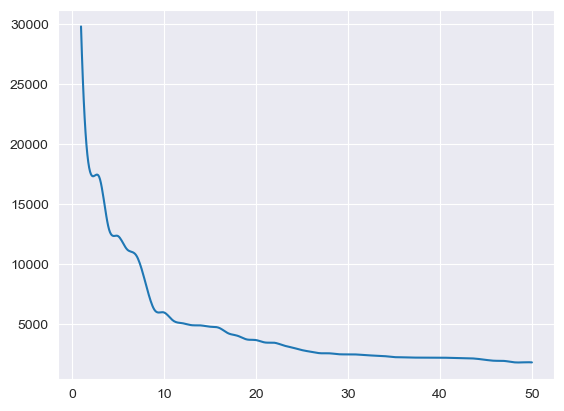

In [62]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

x = np.array([i + 1 for i in range(len(display))])
X_Y_Spline = make_interp_spline(x, np.array(display.frequency))
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)

In [63]:
len(display)

50

---

### Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaningful, and you will be able to observe the so-called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below


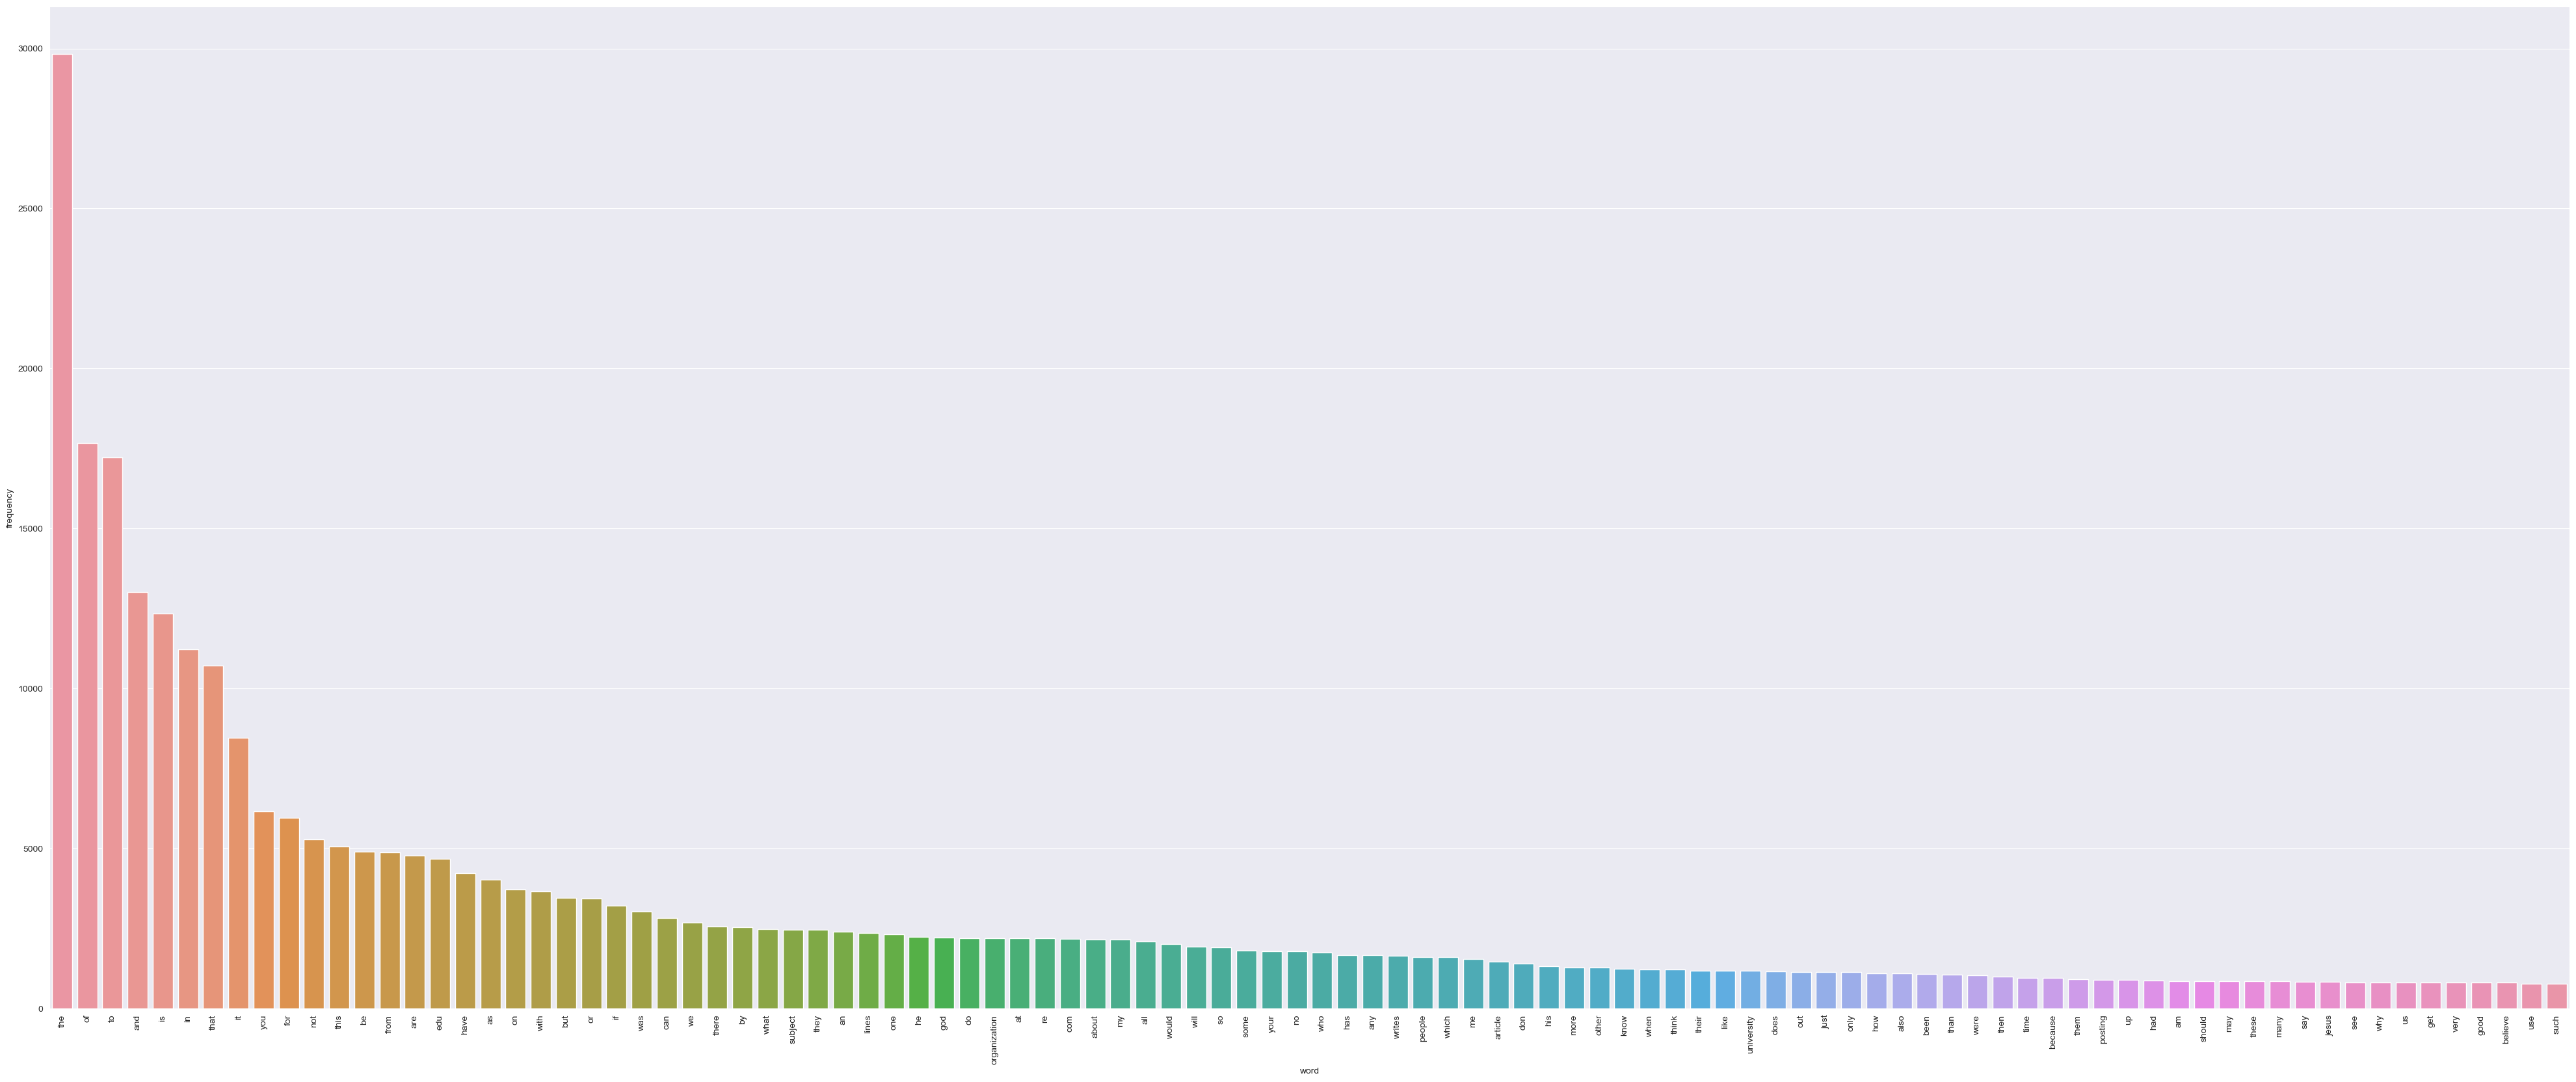

In [64]:
N = 100
display = word_df[:N]
plt.subplots(figsize=(N / 2, N / 5))
# 2 set value to axis x and y
g = sns.barplot(x=display.word,
                y=display.frequency)

# 3 set label to axis x and y
g.set_xticklabels(display.word, rotation=90);

Estimating distributions parameters...
halfnorm (765.9999999999964, 4737.6094119755335)
halfcauchy (765.9999999983604, 851.297830727149)


/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


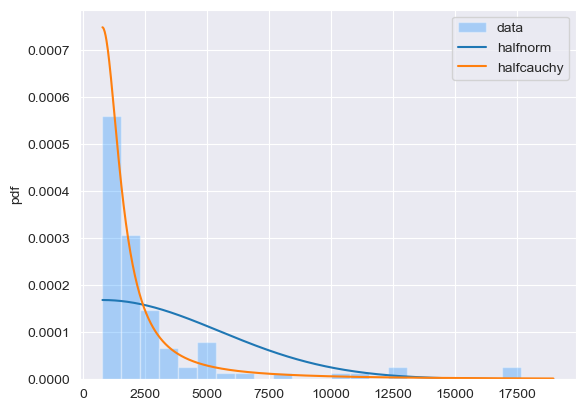

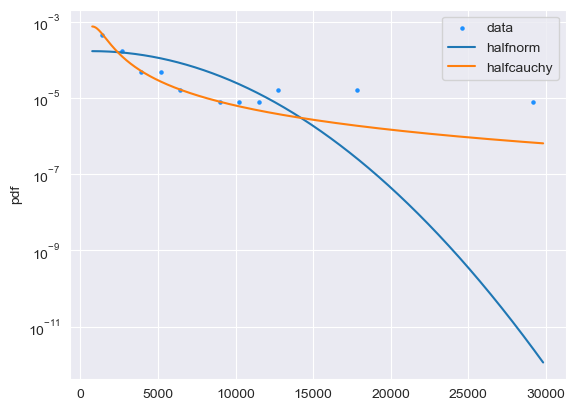

{'halfnorm': (765.9999999999964, 4737.6094119755335),
 'halfcauchy': (765.9999999983604, 851.297830727149)}

In [65]:
import longtail

longtail.plot(display.frequency)

---

#### Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

In [66]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [67]:
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  \
0  From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Pos...   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a...   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayer...   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject: catholic church poland Organization: Faculteit d...   
4  From: stanly@grok11.columbiasc.ncr.com (stanly) Subject: Re: Elder Brother Organization: NCR Cor...   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B. Velasco Jr.) Subject: Re: The arrogance of Chris...   
6  From: jodfishe@silver.ucs.indiana.edu (joseph dale fisher) Subject: Re: anger Organization: Indi...   
7  From: aldridge@netcom.com (Jacquelin Aldridge) Subject: Re: Teenage acne Organization: NETCOM On...   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: Re: Blindsight Reply-To: geb@cs.pitt.edu (Gordon B...   

   category           category_name  \
0         1           comp.graphics   
1         1           comp.graphics   
2         3  soc.religion.christian   
3         3  soc.religion.christian   
4         3  soc.religion.christian   
5         3  soc.religion.christian   
6         3  soc.religion.christian   
7         2                 sci.med   
8         2                 sci.med   

                                                                                              unigrams  \
0  [From, :, sd345, @, city.ac.uk, (, Michael, Collier, ), Subject, :, Converting, images, to, HP, ...   
1  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B., Deglurkar, ), Subject, :, help, :, Splitting, a,...   
2  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, Johnson, ), Subject, :, Re, :, harrassed, at, work...   
3  [From, :, s0612596, @, let.rug.nl, (, M.M, ., Zwart, ), Subject, :, catholic, church, poland, Or...   
4  [From, :, stanly, @, grok11.columbiasc.ncr.com, (, stanly, ), Subject, :, Re, :, Elder, Brother,...   
5  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgilio, (, Dean, ), B., Velasco, Jr., ), Subject, :, R...   
6  [From, :, jodfishe, @, silver.ucs.indiana.edu, (, joseph, dale, fisher, ), Subject, :, Re, :, an...   
7  [From, :, aldridge, @, netcom.com, (, Jacquelin, Aldridge, ), Subject, :, Re, :, Teenage, acne, ...   
8  [From, :, geb, @, cs.pitt.edu, (, Gordon, Banks, ), Subject, :, Re, :, Blindsight, Reply-To, :, ...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

---

### Assignment 2 -- New dataset preprocessing

### Outline
1. Read data
2. Prepare data

#### 1) Data
- Describe file name pattern and document name in the tuple list

In [68]:
import pandas as pd
import helpers.data_mining_helpers as dmh

In [69]:
files = [("amazon_cells", "amazon"), ("imdb", "imdb"), ("yelp", "yelp")]
categories = [category[1] for category in files]
categories

['amazon', 'imdb', 'yelp']

#### 2) Data Preparation

In [70]:
doc_list = []
for index, file in enumerate(files):
    f_name = file[0]
    f_doc = file[1]
    path = 'sentiment labelled sentences/{}_labelled.txt'.format(f_name)
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            splits = line.replace("\n", "").split("\t")
            sentence = splits[0]
            label = splits[1]
            doc_list.append({'text': sentence,
                             'category': index + 1,
                             'category_name': f_doc,
                             'label': label})

X = pd.DataFrame(doc_list).sample(frac=1)
X

text  \
2678                                                        It's a great place and I highly recommend it.   
1396  The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pede...   
807                                                      The reception through this headset is excellent.   
735                                                       Provides good protection and looks classy, too.   
1751                                                              But I thought his acting was skilled.     
...                                                                                                   ...   
2739                                                           Never had anything to complain about here.   
1549  John Garfield, Ann revere, Lilli Plmer, William Conrad, Canada Lee...and filmed by one of the gr...   
771                                                  VERY cheap plastic, creaks like an old wooden floor.   
1074                                         I wouldn't say they're worth 2 hours of your time, though.     
1266                                               Thanks good a movie like this was done and released.     

      category category_name label  
2678         3          yelp     1  
1396         2          imdb     0  
807          1        amazon     1  
735          1        amazon     1  
1751         2          imdb     1  
...        ...           ...   ...  
2739         3          yelp     1  
1549         2          imdb     1  
771          1        amazon     0  
1074         2          imdb     0  
1266         2          imdb     1  

[3000 rows x 4 columns]

In [71]:
X[:10][["text", "category_name"]]

text  \
2678                                                        It's a great place and I highly recommend it.   
1396  The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pede...   
807                                                      The reception through this headset is excellent.   
735                                                       Provides good protection and looks classy, too.   
1751                                                              But I thought his acting was skilled.     
485                                                                                     A Disappointment.   
1507                                 By the time the film ended, I not only disliked it, I despised it.     
1999                          All in all its an insult to one's intelligence and a huge waste of money.     
916   While I managed to bend the leaf spring back in place, the metal now has enough stress that it w...   
1440                                                           Both do good jobs and are quite amusing.     

     category_name  
2678          yelp  
1396          imdb  
807         amazon  
735         amazon  
1751          imdb  
485         amazon  
1507          imdb  
1999          imdb  
916         amazon  
1440          imdb

### 3) Data Manipulation

In [72]:
X[:10]

text  \
2678                                                        It's a great place and I highly recommend it.   
1396  The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pede...   
807                                                      The reception through this headset is excellent.   
735                                                       Provides good protection and looks classy, too.   
1751                                                              But I thought his acting was skilled.     
485                                                                                     A Disappointment.   
1507                                 By the time the film ended, I not only disliked it, I despised it.     
1999                          All in all its an insult to one's intelligence and a huge waste of money.     
916   While I managed to bend the leaf spring back in place, the metal now has enough stress that it w...   
1440                                                           Both do good jobs and are quite amusing.     

      category category_name label  
2678         3          yelp     1  
1396         2          imdb     0  
807          1        amazon     1  
735          1        amazon     1  
1751         2          imdb     1  
485          1        amazon     0  
1507         2          imdb     0  
1999         2          imdb     0  
916          1        amazon     0  
1440         2          imdb     1

In [73]:
# using loc (by label)
X.loc[::10, ['text']]

text
2678                                                        It's a great place and I highly recommend it.
1505                                 About ten minutes into this film I started having second thoughts.  
794                                    The internet access was fine, it the rare instance that it worked.
6     If you have several dozen or several hundred contacts, then imagine the fun of sending each of t...
158                                                                           And I just love the colors!
...                                                                                                   ...
1224     The flat reenactments don't hold your attention because they are emotionally adrift and stagy.  
1843  It has everything you could want... suspense, drama, comedy, confusing subplots, native american...
1582                                                                       Filmiing was less expansive.  
1681  The film gives meaning to the phrase, "Never in the history of human conflict has so much been o...
1955                                                           The movie seemed a little slow at first.  

[300 rows x 1 columns]

In [74]:
# using loc (by position)
X.iloc[::10, 0:1]

text
2678                                                        It's a great place and I highly recommend it.
1505                                 About ten minutes into this film I started having second thoughts.  
794                                    The internet access was fine, it the rare instance that it worked.
6     If you have several dozen or several hundred contacts, then imagine the fun of sending each of t...
158                                                                           And I just love the colors!
...                                                                                                   ...
1224     The flat reenactments don't hold your attention because they are emotionally adrift and stagy.  
1843  It has everything you could want... suspense, drama, comedy, confusing subplots, native american...
1582                                                                       Filmiing was less expansive.  
1681  The film gives meaning to the phrase, "Never in the history of human conflict has so much been o...
1955                                                           The movie seemed a little slow at first.  

[300 rows x 1 columns]

In [75]:
X[::10][0:10]

text  \
2678                                                        It's a great place and I highly recommend it.   
1505                                 About ten minutes into this film I started having second thoughts.     
794                                    The internet access was fine, it the rare instance that it worked.   
6     If you have several dozen or several hundred contacts, then imagine the fun of sending each of t...   
158                                                                           And I just love the colors!   
1616                                                                       My rating: just 3 out of 10.     
2533  If you love authentic Mexican food and want a whole bunch of interesting, yet delicious meats to...   
2042  Hard to judge whether these sides were good because we were grossed out by the melted styrofoam ...   
886                              I didn't want the clip going over the top of my ear, causing discomfort.   
1958                                                                                      I enjoyed it.     

      category category_name label  
2678         3          yelp     1  
1505         2          imdb     0  
794          1        amazon     0  
6            1        amazon     0  
158          1        amazon     1  
1616         2          imdb     0  
2533         3          yelp     1  
2042         3          yelp     0  
886          1        amazon     0  
1958         2          imdb     1

In [76]:
# 1. Sorting using  sort_index()
# Last to first row
print("-" * 20 + "Last to first row" + "-" * 20)
l_2_f = X.sort_index(ascending=False)
print(l_2_f)

# First to last row
print("-" * 20 + "First to last row" + "-" * 20)
f_2_l = X.sort_index(ascending=True)
print(f_2_l)

--------------------Last to first row--------------------
                                                                                                     text  \
2999  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing ou...   
2998          The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.   
2997                                                   Overall I was not impressed and would not go back.   
2996                                                                             Appetite instantly gone.   
2995                                   I think food should have flavor and texture and both were lacking.   
...                                                                                                   ...   
4                                                                                       The mic is great.   
3                         Tied to charger for conversations lasting mo

---

#### Exercise 2 - Experiment with other querying techniques using pandas dataframes.

In [77]:
X.query('category in (2,3)').sort_values(by='category')

text  \
1266                                               Thanks good a movie like this was done and released.     
1262  The cinematography is simply stunning (to say the least) and the fx are nothing if not state-of-...   
1076  I especially liked the non-cliche choices with the parents; in other movies, I could predict the...   
1890  The only consistent thread holding the series together were the amazing performances of Leni Par...   
1743  Tom Wilkinson's character is a man who is not prepared for the ordeal that is about to begin, bu...   
...                                                                                                   ...   
2007  The potatoes were like rubber and you could tell they had been made up ahead of time being kept ...   
2389                                                                    Def coming back to bowl next time   
2567                                                                                  Food was delicious!   
2712                                                                                        2 Thumbs Up!!   
2546                   Last night was my second time dining here and I was so happy I decided to go back!   

      category category_name label  
1266         2          imdb     1  
1262         2          imdb     1  
1076         2          imdb     1  
1890         2          imdb     0  
1743         2          imdb     1  
...        ...           ...   ...  
2007         3          yelp     0  
2389         3          yelp     1  
2567         3          yelp     1  
2712         3          yelp     1  
2546         3          yelp     1  

[2000 rows x 4 columns]

In [78]:
count_category_types = X.groupby(by=['category', 'category_name'], group_keys=True).count().sort_values(by=['text'],
                                                                                                        ascending=False)
count_category_types

text  label
category category_name             
1        amazon         1000   1000
2        imdb           1000   1000
3        yelp           1000   1000

In [79]:
print("average records per category: ", count_category_types['text'].mean())
print("median records per category: ", count_category_types['text'].median())
print("max records among categories: ", count_category_types['text'].min())
print("min records among categories: ", count_category_types['text'].max())

average records per category:  1000.0
median records per category:  1000.0
max records among categories:  1000
min records among categories:  1000


---

### Exercise 3:
Try to fetch records belonging to the ```amazon``` category, and query every 10th record. Only show the first 5 records.

In [80]:
X[X['category_name'] == 'amazon'].iloc[::5][:5]

text  \
807                                                     The reception through this headset is excellent.   
435                                                                                 Warning - Stay away.   
6    If you have several dozen or several hundred contacts, then imagine the fun of sending each of t...   
560  Muddy, low quality sound, and the casing around the wire's insert was poorly super glued and sli...   
320                                                                 I am also very happy with the price.   

     category category_name label  
807         1        amazon     1  
435         1        amazon     0  
6           1        amazon     0  
560         1        amazon     0  
320         1        amazon     1

---

### 4. Data Mining using Pandas

#### 4.1 Missing Values

In [81]:
# check missing values
X.isnull()

text  category  category_name  label
2678  False     False          False  False
1396  False     False          False  False
807   False     False          False  False
735   False     False          False  False
1751  False     False          False  False
...     ...       ...            ...    ...
2739  False     False          False  False
1549  False     False          False  False
771   False     False          False  False
1074  False     False          False  False
1266  False     False          False  False

[3000 rows x 4 columns]

In [82]:
X.isnull().apply(lambda d: dmh.check_missing_values(d))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                               label  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

### >>> **Exercise 4 :**
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.

In [83]:
# Answer here
X.isnull().apply(lambda d: dmh.check_missing_values(d), axis=1).to_frame()

0
2678  (The amoung of missing records is: , 0)
1396  (The amoung of missing records is: , 0)
807   (The amoung of missing records is: , 0)
735   (The amoung of missing records is: , 0)
1751  (The amoung of missing records is: , 0)
...                                       ...
2739  (The amoung of missing records is: , 0)
1549  (The amoung of missing records is: , 0)
771   (The amoung of missing records is: , 0)
1074  (The amoung of missing records is: , 0)
1266  (The amoung of missing records is: , 0)

[3000 rows x 1 columns]

### Try to search for non values
- Translate from pandas data `Series` to pandas `DataFrame`
- Translate from `Dictionary` to pandas `DataFrame`
- Eliminate the non-value

In [84]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame()

0
text      dummy_record
category             1

In [85]:
dummy_series.to_frame().T

text category
0  dummy_record        1

In [86]:
# Pandas series to DataFrame
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series[-1:]

text category category_name label
3000  dummy_record        1           NaN   NaN

In [87]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                               label  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [88]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
               }]

In [89]:
# Pandas dictionary to DataFrame
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X[-1:]

text  category category_name label
3000  dummy_record         1           NaN   NaN

In [90]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                               label  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [91]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                               label  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [92]:
len(X)

3000

### 4.2 Dealing with Duplicate Data

In [93]:
sum(X.duplicated())

17

In [94]:
X.drop_duplicates(keep=False, inplace=True)
len(X), sum(X.duplicated())

(2966, 0)

### 5.  Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

#### 5.1 Sampling

In [95]:
X_sample = X.sample(n=1000)
X_sample

text  \
150                                          Nargile - I think you are great.   
1763                                                   The phone loads super!   
2433                                        Strike 2, who wants to be rushed.   
233                           I own 2 of these cases and would order another.   
2                            The reception through this headset is excellent.   
...                                                                       ...   
2184         The service was outshining & I definitely recommend the Halibut.   
386                                      I vomited in the bathroom mid lunch.   
1897   Every time I eat here, I see caring teamwork to a professional degree.   
315                            I've had better bagels from the grocery store.   
640   The service was great, even the manager came and helped with our table.   

      category category_name label  
150          3          yelp     1  
1763         1        amazon     1  
2433         3          yelp     0  
233          1        amazon     1  
2            1        amazon     1  
...        ...           ...   ...  
2184         3          yelp     1  
386          3          yelp     0  
1897         3          yelp     1  
315          3          yelp     0  
640          3          yelp     1  

[1000 rows x 4 columns]

In [96]:
X[0:10]

text  \
0                                                        It's a great place and I highly recommend it.   
1  The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pede...   
2                                                     The reception through this headset is excellent.   
3                                                      Provides good protection and looks classy, too.   
4                                                              But I thought his acting was skilled.     
5                                                                                    A Disappointment.   
6                                 By the time the film ended, I not only disliked it, I despised it.     
7                          All in all its an insult to one's intelligence and a huge waste of money.     
8  While I managed to bend the leaf spring back in place, the metal now has enough stress that it w...   
9                                                           Both do good jobs and are quite amusing.     

   category category_name label  
0         3          yelp     1  
1         2          imdb     0  
2         1        amazon     1  
3         1        amazon     1  
4         2          imdb     1  
5         1        amazon     0  
6         2          imdb     0  
7         2          imdb     0  
8         1        amazon     0  
9         2          imdb     1

In [97]:
X_sample[0:10]

text  \
150                                                                      Nargile - I think you are great.   
1763                                                                               The phone loads super!   
2433                                                                    Strike 2, who wants to be rushed.   
233                                                       I own 2 of these cases and would order another.   
2                                                        The reception through this headset is excellent.   
2146                                             An excellent new restaurant by an experienced Frenchman.   
171   One nice thing was that they added gratuity on the bill since our party was larger than 6 or 8, ...   
2177                                                           Nine out of ten for a truly lovely film.     
116                                                                               Food was really boring.   
1798                                     I've had this for nearly 2 years and it has worked great for me.   

      category category_name label  
150          3          yelp     1  
1763         1        amazon     1  
2433         3          yelp     0  
233          1        amazon     1  
2            1        amazon     1  
2146         3          yelp     1  
171          3          yelp     1  
2177         2          imdb     1  
116          3          yelp     0  
1798         1        amazon     1

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb      994
yelp      992
amazon    980
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

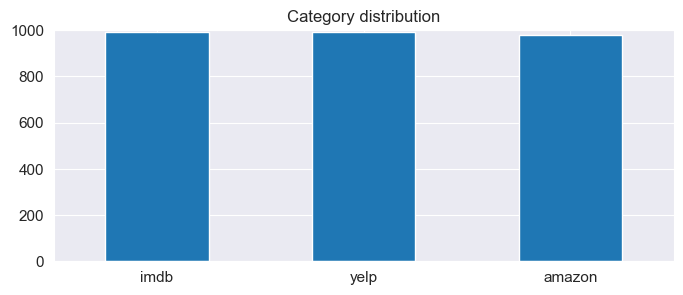

In [99]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind='bar',
                                    title='Category distribution',
                                    ylim=[0, 1000],
                                    rot=0, fontsize=11, figsize=(8, 3))

yelp      347
imdb      337
amazon    316
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

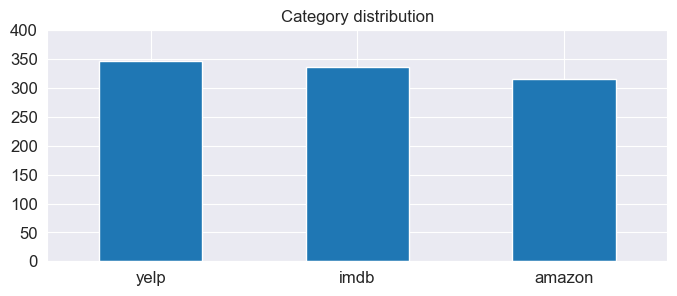

In [100]:
print(X_sample.category_name.value_counts())
X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0, 400],
                                           rot=0, fontsize=12, figsize=(8, 3))

yelp      347
imdb      337
amazon    316
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

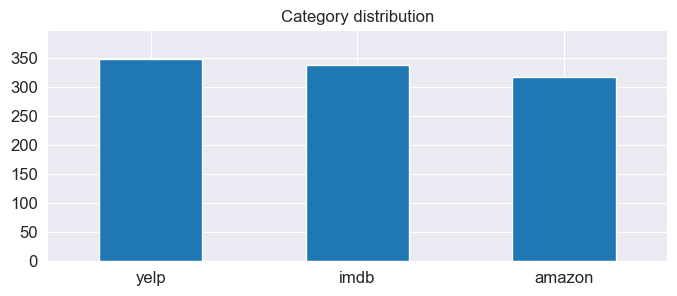

In [101]:
print(X_sample.category_name.value_counts())
upper_bound = max(X_sample.category_name.value_counts() + 50)

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0, upper_bound],
                                           rot=0, fontsize=12, figsize=(8, 3))

In [102]:
count_category_types = X.groupby(by=['category_name', 'label'], group_keys=True).count().sort_values(
    by=['category_name'], ascending=False)

In [103]:
class_df = count_category_types.rename(columns={'text': 'count'}).drop(columns=['category']).reset_index(level=[0, 1])
neg_class = class_df[class_df['label'] == '0']
pos_class = class_df[class_df['label'] == '1']
pos_class, neg_class

(  category_name label  count
 1          yelp     1    498
 3          imdb     1    496
 5        amazon     1    486,
   category_name label  count
 0          yelp     0    494
 2          imdb     0    498
 4        amazon     0    494)

In [104]:
name_list = list(neg_class['category_name'])
neg_count_list = list(neg_class['count'])
pos_count_list = list(pos_class['count'])
"List", name_list, "Negative", neg_count_list, "Positive", pos_count_list

('List',
 ['yelp', 'imdb', 'amazon'],
 'Negative',
 [494, 498, 494],
 'Positive',
 [498, 496, 486])

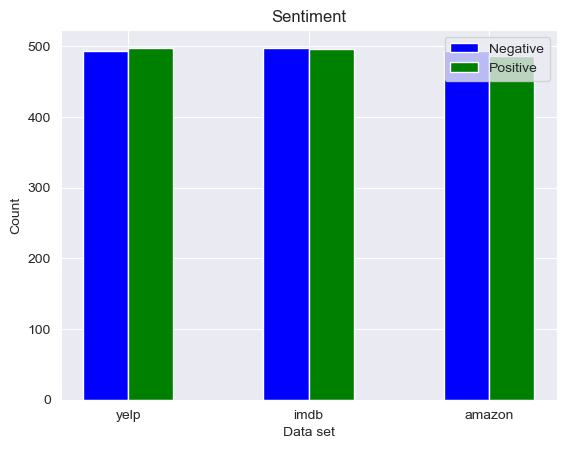

In [105]:
import numpy as np

N = 3
r = np.arange(N)
width = 0.25

plt.bar(r, neg_count_list, color='b', width=width, edgecolor='white', label='Negative')
plt.bar(r + width, pos_count_list, color='g', width=width, edgecolor='white', label='Positive')
plt.xlabel("Data set")

plt.ylabel("Count")
plt.title("Sentiment")
plt.xticks(r + width / 2, name_list)
plt.legend()

In [106]:
from nltk.tokenize import word_tokenize

# word_tokenize("dsd sd xx")
X['unigrams'] = X['text'].apply(lambda x: word_tokenize(x))
list(X[0:1]['unigrams'])

[['It',
  "'s",
  'a',
  'great',
  'place',
  'and',
  'I',
  'highly',
  'recommend',
  'it',
  '.']]

#### 5.3 Feature subset selection

#### Exercise 9

In [107]:
# Generate term-document vector
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [108]:
analyze = count_vect.build_analyzer()
tokenized_text = analyze(X[0:1]['text'][0])
tokenized_text

['it', 'great', 'place', 'and', 'highly', 'recommend', 'it']

In [109]:
X_counts.shape

(2966, 5153)

In [110]:
# obtain the feature names of the vectorizer, i.e., the terms
feature_names = count_vect.get_feature_names_out()
feature_names.tolist()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [111]:
# convert from sparse array to normal array
print(X_counts[0:10, :].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Exercise 10

In [112]:
arr = np.array(X_counts[100, :].toarray())
search = np.where(arr == 1)
for result in search:
    print("index:", result[1], " value:", feature_names[result[1]])

index: 0  value: 00
index: 673  value: can


In [113]:
# first twenty features only
N = 32
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[N:N + N]]

# obtain document index
plot_y = ["doc_" + str(i) for i in list(X.index)[N:N + N]]
plot_z = X_counts[N:N + N, N:N + N].toarray()
plot_x, plot_y, plot_z

(['term_25',
  'term_2mp',
  'term_30',
  'term_30s',
  'term_325',
  'term_35',
  'term_350',
  'term_375',
  'term_3o',
  'term_40',
  'term_40min',
  'term_42',
  'term_44',
  'term_45',
  'term_4s',
  'term_4ths',
  'term_50',
  'term_5020',
  'term_510',
  'term_5320',
  'term_54',
  'term_5lb',
  'term_680',
  'term_70',
  'term_70000',
  'term_700w',
  'term_70s',
  'term_80',
  'term_80s',
  'term_8125',
  'term_85',
  'term_8525'],
 ['doc_32',
  'doc_33',
  'doc_34',
  'doc_35',
  'doc_36',
  'doc_37',
  'doc_38',
  'doc_39',
  'doc_40',
  'doc_41',
  'doc_42',
  'doc_43',
  'doc_44',
  'doc_45',
  'doc_46',
  'doc_47',
  'doc_49',
  'doc_50',
  'doc_51',
  'doc_52',
  'doc_53',
  'doc_54',
  'doc_55',
  'doc_56',
  'doc_57',
  'doc_58',
  'doc_59',
  'doc_60',
  'doc_61',
  'doc_62',
  'doc_63',
  'doc_64'],
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0,

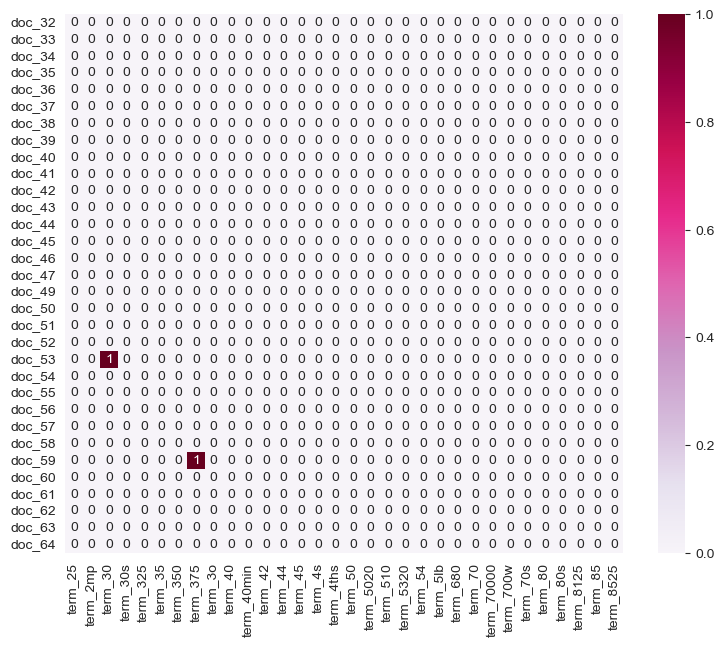

In [114]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Exercise 11

In [115]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(X.text)

text_encoded_phrase = tok.texts_to_sequences(X.text)
text_encoded_phrase[0]

[38, 4, 22, 40, 2, 3, 200, 109, 6]

In [116]:
text_to_sequence_result = ""
for sequence in text_encoded_phrase[0]:
    text_to_sequence_result = text_to_sequence_result + " " + tok.index_word[sequence]
print("text_to_sequence_result:\n", text_to_sequence_result)
print("-" * 100)
print("original text:\n", X.text[0])

text_to_sequence_result:
  it's a great place and i highly recommend it
----------------------------------------------------------------------------------------------------
original text:
 It's a great place and I highly recommend it.


---

### 5.4 Dimensionality Reduction
- 2 components
- 3 components

In [117]:
# 2 PC components
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(X_counts.toarray())
X_reduced.shape, X_counts.shape

((2966, 2), (2966, 5153))

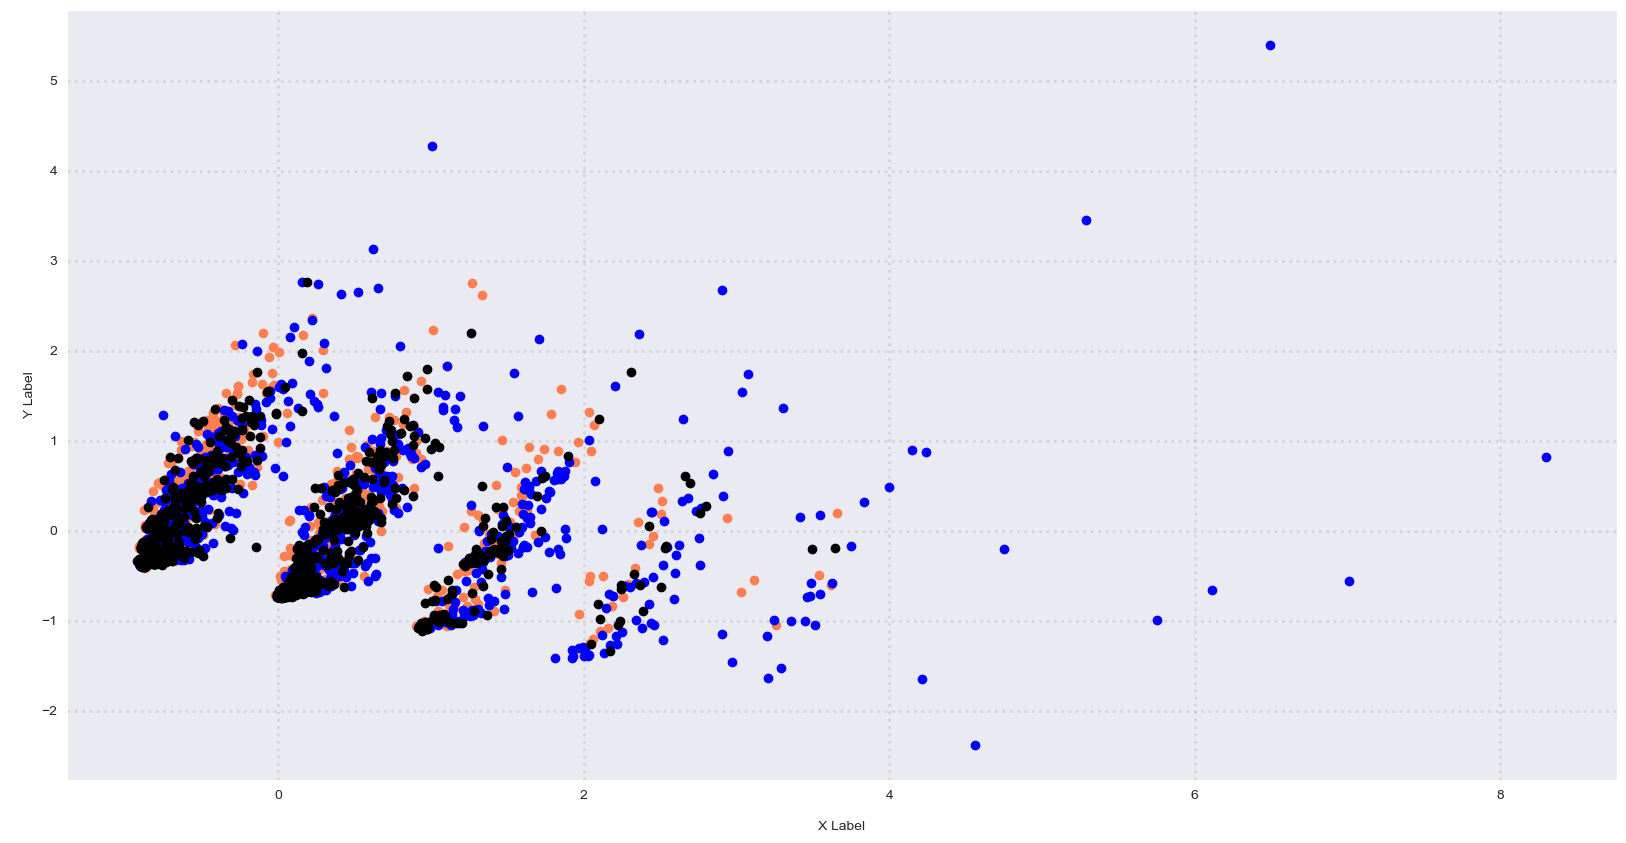

In [118]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### Exercise 12

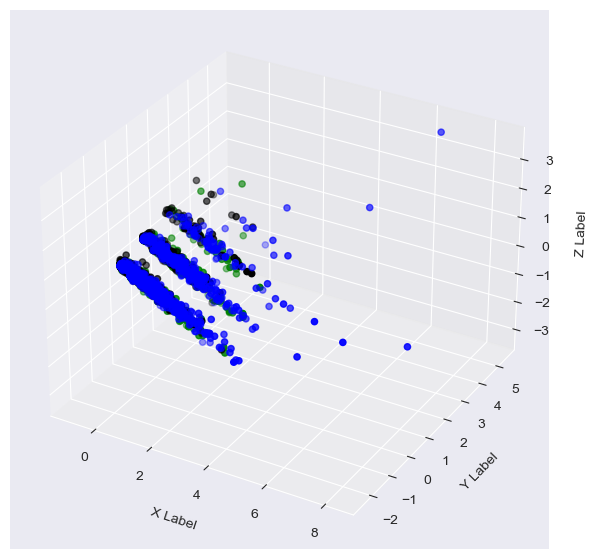

In [119]:
# 3 PC components
X_3d_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
col = ['green', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_3d_reduced[X['category_name'] == category].T[0]
    ys = X_3d_reduced[X['category_name'] == category].T[1]
    zs = X_3d_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

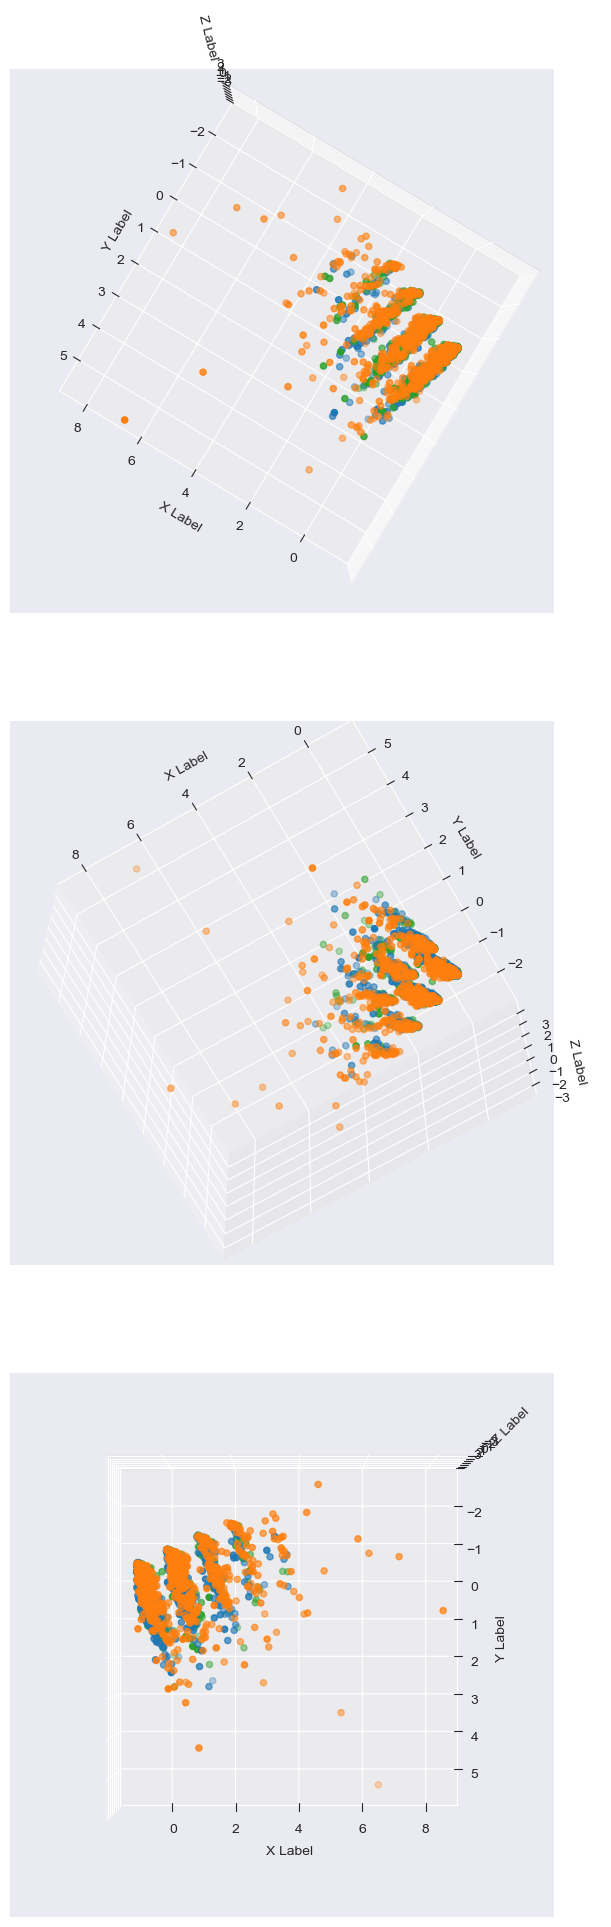

In [120]:
# Multi camera views
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize=(24, 24))
# plt.subplots_adjust(hspace=0.5)

# fig = plt.figure(figsize = (8, 8))
# ax = plt.axes(projection = '3d')
view_points = [(90, 120), (-70, 120), (-90, -90)]

for index, view in enumerate(view_points):
    for c, category in zip(col, categories):
        xs = X_3d_reduced[X['category_name'] == category].T[0]
        ys = X_3d_reduced[X['category_name'] == category].T[1]
        zs = X_3d_reduced[X['category_name'] == category].T[2]
        ax = plt.subplot(3, 1, index + 1, projection='3d')
        ax.set_xlabel('\nX Label')
        ax.set_ylabel('\nY Label')
        ax.set_zlabel('\nZ Label')
        ax.view_init(view[0], view[1])
        ax.grid(color='grey', linestyle=':', linewidth=1, alpha=0.2)
        ax.scatter(xs, ys, zs, cmap=c, marker='o')

### 5.5 Attribute Transformation / Aggregation

In [121]:
import numpy as np

term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

In [122]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies.tolist())

[1, 34, 3, 2, 4, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 7, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 4, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 5, 4, 1, 85, 7, 1, 1, 1, 21, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 3, 43, 7, 1, 1, 1, 1, 10, 19, 3, 3, 1, 16, 1, 1, 2, 1, 1, 2, 3, 4, 2, 1, 1, 1, 1, 1, 6, 1, 1, 2, 4, 3, 1, 1, 1, 1, 2, 2, 52, 2, 49, 2, 4, 1, 1, 1, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 148, 1, 1, 1, 2, 2, 2, 1, 14, 3, 5, 1, 1, 4, 74, 8, 1, 24, 35, 1, 1, 3, 34, 1, 9, 7, 3, 2, 2, 2, 2, 8, 1, 2, 1, 106, 1, 1138, 1, 3, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 7, 22, 2, 1, 1, 1, 1, 1, 1, 53, 1, 23, 15, 5, 4, 1, 1, 3, 1, 1, 1, 1, 3, 2, 4, 4, 3, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 180, 10, 5, 1, 1, 1, 1, 1, 1, 1, 21, 2, 1, 8, 1, 1, 13, 1, 1, 1, 2, 1, 1, 1, 175, 1, 2, 8, 5, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 1, 2, 135, 3, 1, 12, 2, 1, 2, 1

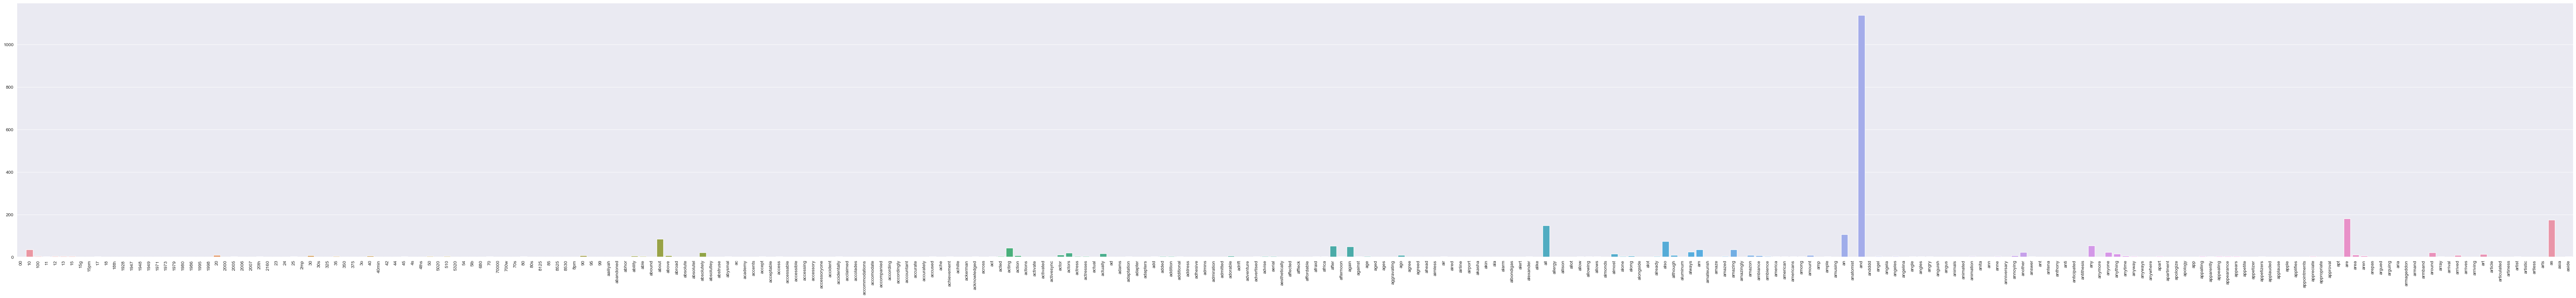

In [123]:
# 1 set the size
plt.subplots(figsize=(100, 10))

# 2 set value to axis x and y
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])

# 3 set label to axis x and y
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90);

#### Exercise 13

In [124]:
import copy

word_df = pd.DataFrame(copy.deepcopy(count_vect.get_feature_names_out()))
word_df.insert(len(word_df.columns), "frequency", pd.DataFrame(term_frequencies), True)
###
word_df = word_df.rename(columns={0: "word"})

N = 20
display = word_df[:N]
display

word  frequency
0     00          1
1     10         34
2    100          3
3     11          2
4     12          4
5     13          3
6     15          3
7    15g          1
8   15pm          1
9     17          2
10    18          1
11  18th          1
12  1928          1
13  1947          1
14  1948          1
15  1949          1
16  1971          1
17  1973          1
18  1979          1
19  1980          1

([<matplotlib.patches.Wedge at 0x2a2cf1850>,
 [Text(1.0986750018256897, 0.05397444176015982, '00'),
  Text(-0.21459935421774104, 1.0788638084435536, '10'),
  Text(-0.9943882224357878, -0.47031060277331005, '100'),
  Text(-0.8503114986990109, -0.6978326125800098, '11'),
  Text(-0.6111272563215624, -0.9146165735327998, '12'),
  Text(-0.26727819789359053, -1.0670343785139984, '13'),
  Text(0.05397444176015943, -1.0986750018256897, '15'),
  Text(0.26727819789359014, -1.0670343785139984, '15g'),
  Text(0.3705788387314416, -1.0356984717013231, '15pm'),
  Text(0.5185364105085973, -0.9701133907831906, '17'),
  Text(0.6552692349416762, -0.8835282846287099, '18'),
  Text(0.7387148503317204, -0.815046237890455, '18th'),
  Text(0.8150462378904547, -0.7387148503317206, '1928'),
  Text(0.8835282846287096, -0.6552692349416767, '1947'),
  Text(0.9435014710002992, -0.5655130186125441, '1948'),
  Text(0.9943882224357875, -0.4703106027733108, '1949'),
  Text(1.035698471701323, -0.37057883873144204, '1971

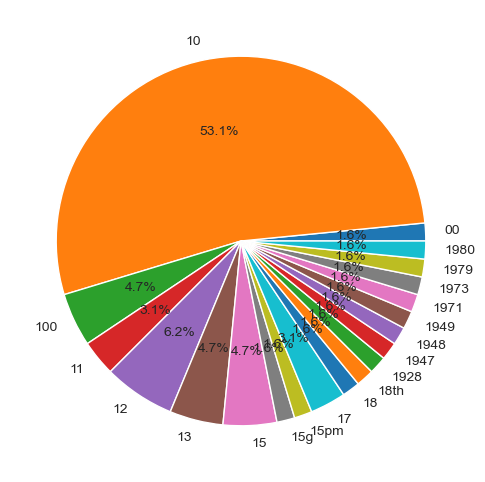

In [125]:
fig, ax = plt.subplots(figsize=(6, 6))
N = 20
ax.pie(display.frequency[:N], labels=display.word[:N], autopct='%.1f%%')

<AxesSubplot:title={'center':'Word Frequency'}, xlabel='word', ylabel='frequency'>

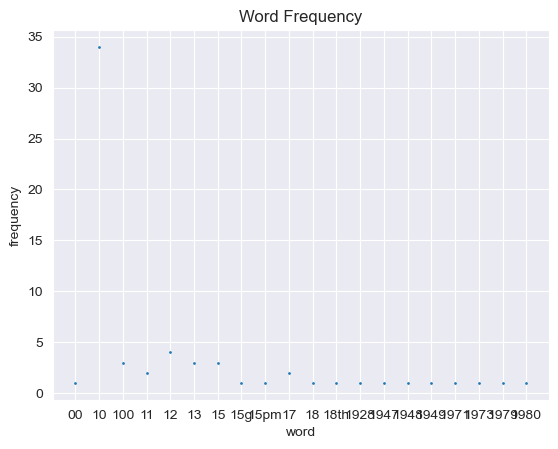

In [126]:
display.plot(kind='scatter', x='word', y='frequency',
             title='Word Frequency', s=0.9)

<AxesSubplot:title={'center':'Word Frequency'}, ylabel='Frequency'>

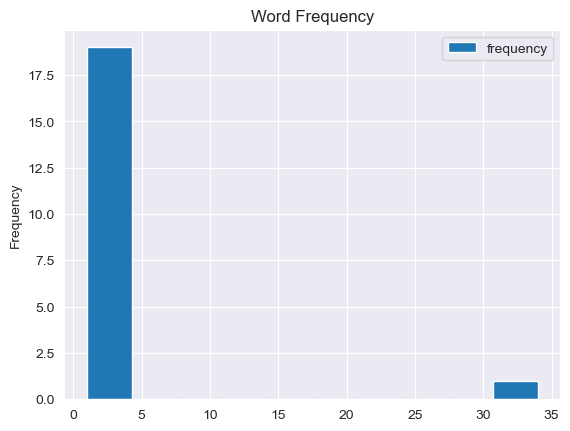

In [127]:
display.plot(kind='hist', x='word', y='frequency',
             title='Word Frequency')

### **Exercise 14:**
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

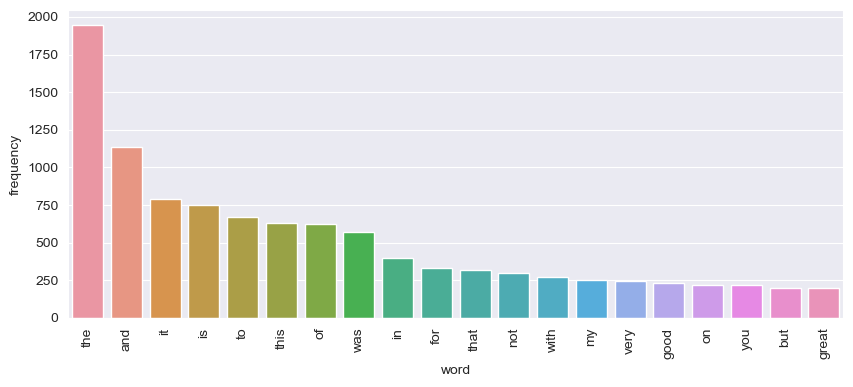

In [128]:
# 1 sorting
word_df = word_df.sort_values("frequency", ascending=False)
N = 20
display = word_df[:N]

plt.subplots(figsize=(N / 2, N / 5))
# 2 set value to axis x and y
g = sns.barplot(x=display.word,
                y=display.frequency)

# 3 set label to axis x and y
g.set_xticklabels(display.word, rotation=90);

### Topic Modeling
In order to derive meaningful visualization, LDA topic model can be utilized to see the insight information.
The LDA topic model using `LdaModel()`, we need the corpus and dictionary. Let’s create them first and then build the model.

### Tokenize Sentences and Clean
Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using `simple_preprocess()`
and build bigram, trigram models and lemmatize (declare in the `data_mining_helpers.py`).

Lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

Keep only these POS tags because they are the ones contributing the most to the meaning of the sentences


In [129]:
data = X.text.values.tolist()
data_words = list(dmh.sent_to_words(data))

In [130]:
data_words[:1]

[['its', 'great', 'place', 'and', 'highly', 'recommend', 'it']]

In [131]:
data_ready = dmh.process_words(data_words)  # processed Text Data!

In [132]:
len(data_ready)

2966

In [133]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
print(id2word)

Dictionary<3461 unique tokens: ['great', 'place', 'annoying', 'cover', 'girl']...>


In [134]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(16, 1), (17, 1), (18, 1)],
 [(19, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(25, 1), (26, 1), (27, 1), (28, 1)],
 [(1, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(12, 1), (37, 1), (38, 1)],
 [(23, 1), (39, 1), (40, 1), (41, 1), (42, 1)],
 [(0, 1), (43, 1), (44, 1), (45, 1)],
 [(46, 1), (47, 1), (48, 1), (49, 1)],
 [(50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(59, 1), (60, 1), (61, 1)],
 [(23, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(68, 1), (69, 1), (70, 1), (71, 1), (72, 1)],
 [(0, 1)],
 [(73, 1), (74, 1)],
 [(75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1)],
 [(81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],
 [(13, 1), (87, 1), (88, 1), (89, 1)],
 [(18, 1),
  (90, 1),
  (91, 1),
  (92, 1)

In [135]:
categories

['amazon', 'imdb', 'yelp']

In [136]:
len(id2word)

3461

The trained topics (keywords and weights) are printed below as well.
If we examine topic keywords, they are nicely segregate and collectively represent the topics we initially chose: atheism, religion, graphics and med.

In [137]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=len(categories),
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)
lda_model.print_topics()

[(0,
  '0.047*"good" + 0.018*"recommend" + 0.015*"watch" + 0.013*"look" + 0.011*"bad" + 0.011*"buy" + 0.011*"new" + 0.010*"love" + 0.010*"nice" + 0.009*"thing"'),
 (1,
  '0.042*"movie" + 0.033*"work" + 0.024*"food" + 0.010*"way" + 0.010*"problem" + 0.010*"waste" + 0.010*"money" + 0.009*"try" + 0.008*"order" + 0.008*"highly"'),
 (2,
  '0.038*"film" + 0.037*"phone" + 0.033*"great" + 0.017*"time" + 0.016*"place" + 0.010*"ve" + 0.010*"service" + 0.009*"probably" + 0.009*"excellent" + 0.008*"table"')]

### Find The Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

In [138]:
df_topic_sents_keywords = dmh.format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_topic_sents_keywords

/Users/kneskung/DataspellProjects/DM Class/DM2022-Lab1-Homework/helpers/data_mining_helpers.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(
/Users/kneskung/DataspellProjects/DM Class/DM2022-Lab1-Homework/helpers/data_mining_helpers.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


Dominant_Topic  Percentage_Contribution  \
0                  2                   0.7778   
1                  0                   0.4951   
2                  2                   0.8332   
3                  0                   0.8807   
4                  1                   0.4741   
...              ...                      ...   
2961               2                   0.6665   
2962               2                   0.9047   
2963               0                   0.7873   
2964               2                   0.8333   
2965               1                   0.6124   

                                                                Topic_Keywords  \
0     film, phone, great, time, place, ve, service, probably, excellent, table   
1               good, recommend, watch, look, bad, buy, new, love, nice, thing   
2     film, phone, great, time, place, ve, service, probably, excellent, table   
3               good, recommend, watch, look, bad, buy, new, love, nice, thing   
4            movie, work, food, way, problem, waste, money, try, order, highly   
...                                                                        ...   
2961  film, phone, great, time, place, ve, service, probably, excellent, table   
2962  film, phone, great, time, place, ve, service, probably, excellent, table   
2963            good, recommend, watch, look, bad, buy, new, love, nice, thing   
2964  film, phone, great, time, place, ve, service, probably, excellent, table   
2965         movie, work, food, way, problem, waste, money, try, order, highly   

                                                  0  
0                                    [great, place]  
1     [annoying, thing, cover, girl, way, pedestal]  
2                   [reception, headset, excellent]  
3         [provide, good, protection, look, classy]  
4                             [think, act, skilled]  
...                                             ...  
2961                                     [complain]  
2962       [film, great, grace, screen, wong, howe]  
2963    [cheap, plastic, creak, old, wooden, floor]  
2964                            [worth, hour, time]  
2965                  [thank, good, movie, release]  

[2966 rows x 4 columns]

In [139]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.7778   
1            1               0              0.4951   
2            2               2              0.8332   
3            3               0              0.8807   
4            4               1              0.4741   
5            5               1              0.6650   
6            6               2              0.6046   
7            7               1              0.8631   
8            8               2              0.7398   
9            9               0              0.8233   

                                                                   Keywords  \
0  film, phone, great, time, place, ve, service, probably, excellent, table   
1            good, recommend, watch, look, bad, buy, new, love, nice, thing   
2  film, phone, great, time, place, ve, service, probably, excellent, table   
3            good, recommend, watch, look, bad, buy, new, love, nice, thing   
4         movie, work, food, way, problem, waste, money, try, order, highly   
5         movie, work, food, way, problem, waste, money, try, order, highly   
6  film, phone, great, time, place, ve, service, probably, excellent, table   
7         movie, work, food, way, problem, waste, money, try, order, highly   
8  film, phone, great, time, place, ve, service, probably, excellent, table   
9            good, recommend, watch, look, bad, buy, new, love, nice, thing   

                                                              Text  
0                                                   [great, place]  
1                    [annoying, thing, cover, girl, way, pedestal]  
2                                  [reception, headset, excellent]  
3                        [provide, good, protection, look, classy]  
4                                            [think, act, skilled]  
5                                                 [disappointment]  
6                              [time, film, end, dislike, despise]  
7                               [intelligence, huge, waste, money]  
8  [manage, bend, leaf, spring, place, metal, stress, break, drop]  
9                                             [good, job, amusing]

#### The most representative sentence for each topic
Samples of sentences that most represent a given topic.

In [140]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Percentage_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percentage_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Percentage_Contrib  \
0          0                    0.9540   
1          1                    0.9426   
2          2                    0.9628   

                                                                   Keywords  \
0            good, recommend, watch, look, bad, buy, new, love, nice, thing   
1         movie, work, food, way, problem, waste, money, try, order, highly   
2  film, phone, great, time, place, ve, service, probably, excellent, table   

                                                                                   Representative Text  
0  [interesting, premise, billy, drago, good, dangerous, nut, bag, note, love, drago, talk, rage, c...  
1  [rest, sit, awful, soldier, singe, song, masculinity, pledge, hairsplitte, purity, admiration, s...  
2  [continuity, error, user, comment, different, car, garage, joe, glass, fact, joe, facial, hair, ...

### Frequency Distribution of Word Counts in Documents
When working with a large number of documents, you want to know how big the documents are as a whole and by topic.

In [141]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
doc_lens

[2,
 6,
 3,
 5,
 3,
 1,
 5,
 4,
 9,
 3,
 5,
 4,
 4,
 9,
 3,
 8,
 5,
 1,
 2,
 7,
 6,
 4,
 10,
 7,
 5,
 7,
 4,
 3,
 3,
 2,
 5,
 4,
 6,
 2,
 8,
 8,
 1,
 2,
 6,
 7,
 2,
 6,
 9,
 2,
 7,
 2,
 3,
 11,
 7,
 1,
 9,
 2,
 5,
 0,
 2,
 2,
 2,
 3,
 7,
 13,
 6,
 3,
 5,
 4,
 4,
 2,
 4,
 2,
 0,
 9,
 2,
 5,
 8,
 2,
 3,
 2,
 4,
 2,
 2,
 5,
 7,
 3,
 6,
 3,
 5,
 2,
 3,
 6,
 4,
 1,
 3,
 2,
 6,
 9,
 3,
 9,
 3,
 3,
 7,
 1,
 1,
 4,
 6,
 11,
 2,
 7,
 2,
 7,
 3,
 7,
 2,
 14,
 5,
 7,
 17,
 2,
 2,
 5,
 9,
 21,
 5,
 3,
 4,
 4,
 9,
 5,
 5,
 7,
 2,
 5,
 3,
 1,
 4,
 4,
 2,
 4,
 3,
 6,
 4,
 3,
 8,
 5,
 1,
 1,
 4,
 7,
 3,
 4,
 5,
 3,
 4,
 1,
 7,
 8,
 13,
 7,
 6,
 12,
 1,
 3,
 2,
 7,
 1,
 1,
 3,
 5,
 3,
 8,
 2,
 4,
 7,
 3,
 4,
 9,
 0,
 2,
 3,
 4,
 4,
 1,
 9,
 8,
 4,
 5,
 1,
 3,
 3,
 4,
 4,
 9,
 5,
 4,
 3,
 3,
 9,
 1,
 4,
 1,
 9,
 1,
 8,
 1,
 2,
 3,
 2,
 6,
 1,
 7,
 6,
 12,
 2,
 1,
 3,
 4,
 2,
 3,
 5,
 5,
 7,
 5,
 0,
 4,
 6,
 15,
 5,
 4,
 1,
 12,
 8,
 3,
 2,
 2,
 9,
 2,
 4,
 3,
 2,
 4,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 13,
 2,

### Word Clouds of Top N Keywords in Each Topic
We have already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics have been taken here is followed in the subsequent plots as well.

In [142]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated an

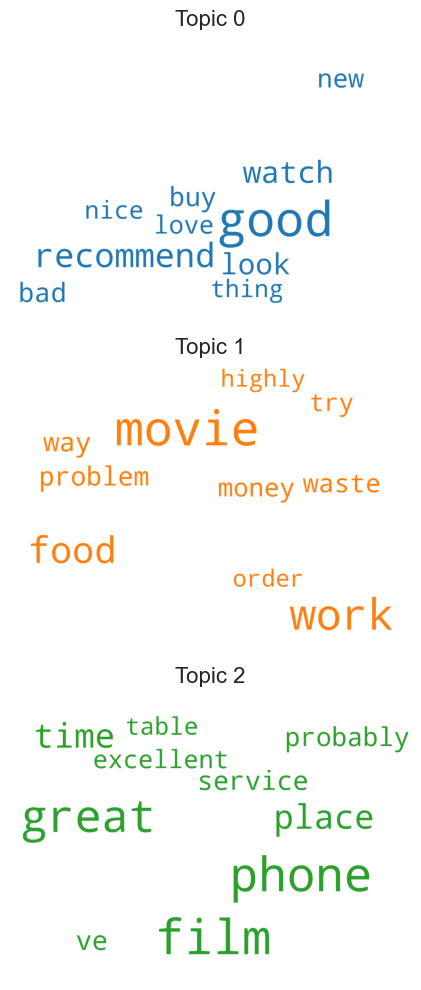

In [143]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight.

Often such words turn out to be less important. The chart have been drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [144]:
from collections import Counter

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

In [145]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i, weight, counter[word]])
out

[['good', 0, 0.046709195, 282],
 ['recommend', 0, 0.018309988, 46],
 ['watch', 0, 0.0147757875, 52],
 ['look', 0, 0.013487956, 62],
 ['bad', 0, 0.011254168, 152],
 ['buy', 0, 0.011045493, 43],
 ['new', 0, 0.01065934, 30],
 ['love', 0, 0.010179548, 81],
 ['nice', 0, 0.009762706, 53],
 ['thing', 0, 0.009418032, 53],
 ['movie', 1, 0.041949846, 211],
 ['work', 1, 0.03304592, 137],
 ['food', 1, 0.023513444, 123],
 ['way', 1, 0.010310547, 47],
 ['problem', 1, 0.010168987, 32],
 ['waste', 1, 0.009823788, 47],
 ['money', 1, 0.009670603, 31],
 ['try', 1, 0.008886696, 43],
 ['order', 1, 0.008145018, 37],
 ['highly', 1, 0.007901687, 12],
 ['film', 2, 0.038049288, 187],
 ['phone', 2, 0.036847003, 169],
 ['great', 2, 0.033116873, 202],
 ['time', 2, 0.016815232, 132],
 ['place', 2, 0.016462626, 116],
 ['ve', 2, 0.009910728, 66],
 ['service', 2, 0.00972704, 95],
 ['probably', 2, 0.009350503, 21],
 ['excellent', 2, 0.008639277, 51],
 ['table', 2, 0.008235031, 14]]

In [146]:
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
df

word  topic_id  importance  word_count
0        good         0    0.046709         282
1   recommend         0    0.018310          46
2       watch         0    0.014776          52
3        look         0    0.013488          62
4         bad         0    0.011254         152
5         buy         0    0.011045          43
6         new         0    0.010659          30
7        love         0    0.010180          81
8        nice         0    0.009763          53
9       thing         0    0.009418          53
10      movie         1    0.041950         211
11       work         1    0.033046         137
12       food         1    0.023513         123
13        way         1    0.010311          47
14    problem         1    0.010169          32
15      waste         1    0.009824          47
16      money         1    0.009671          31
17        try         1    0.008887          43
18      order         1    0.008145          37
19     highly         1    0.007902          12
20       film         2    0.038049         187
21      phone         2    0.036847         169
22      great         2    0.033117         202
23       time         2    0.016815         132
24      place         2    0.016463         116
25         ve         2    0.009911          66
26    service         2    0.009727          95
27   probably         2    0.009351          21
28  excellent         2    0.008639          51
29      table         2    0.008235          14

/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3477234565.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3477234565.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/1t/798ky1kx003ft5w1l83k6v9h0000gn/T/ipykernel_52992/3477234565.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')


Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

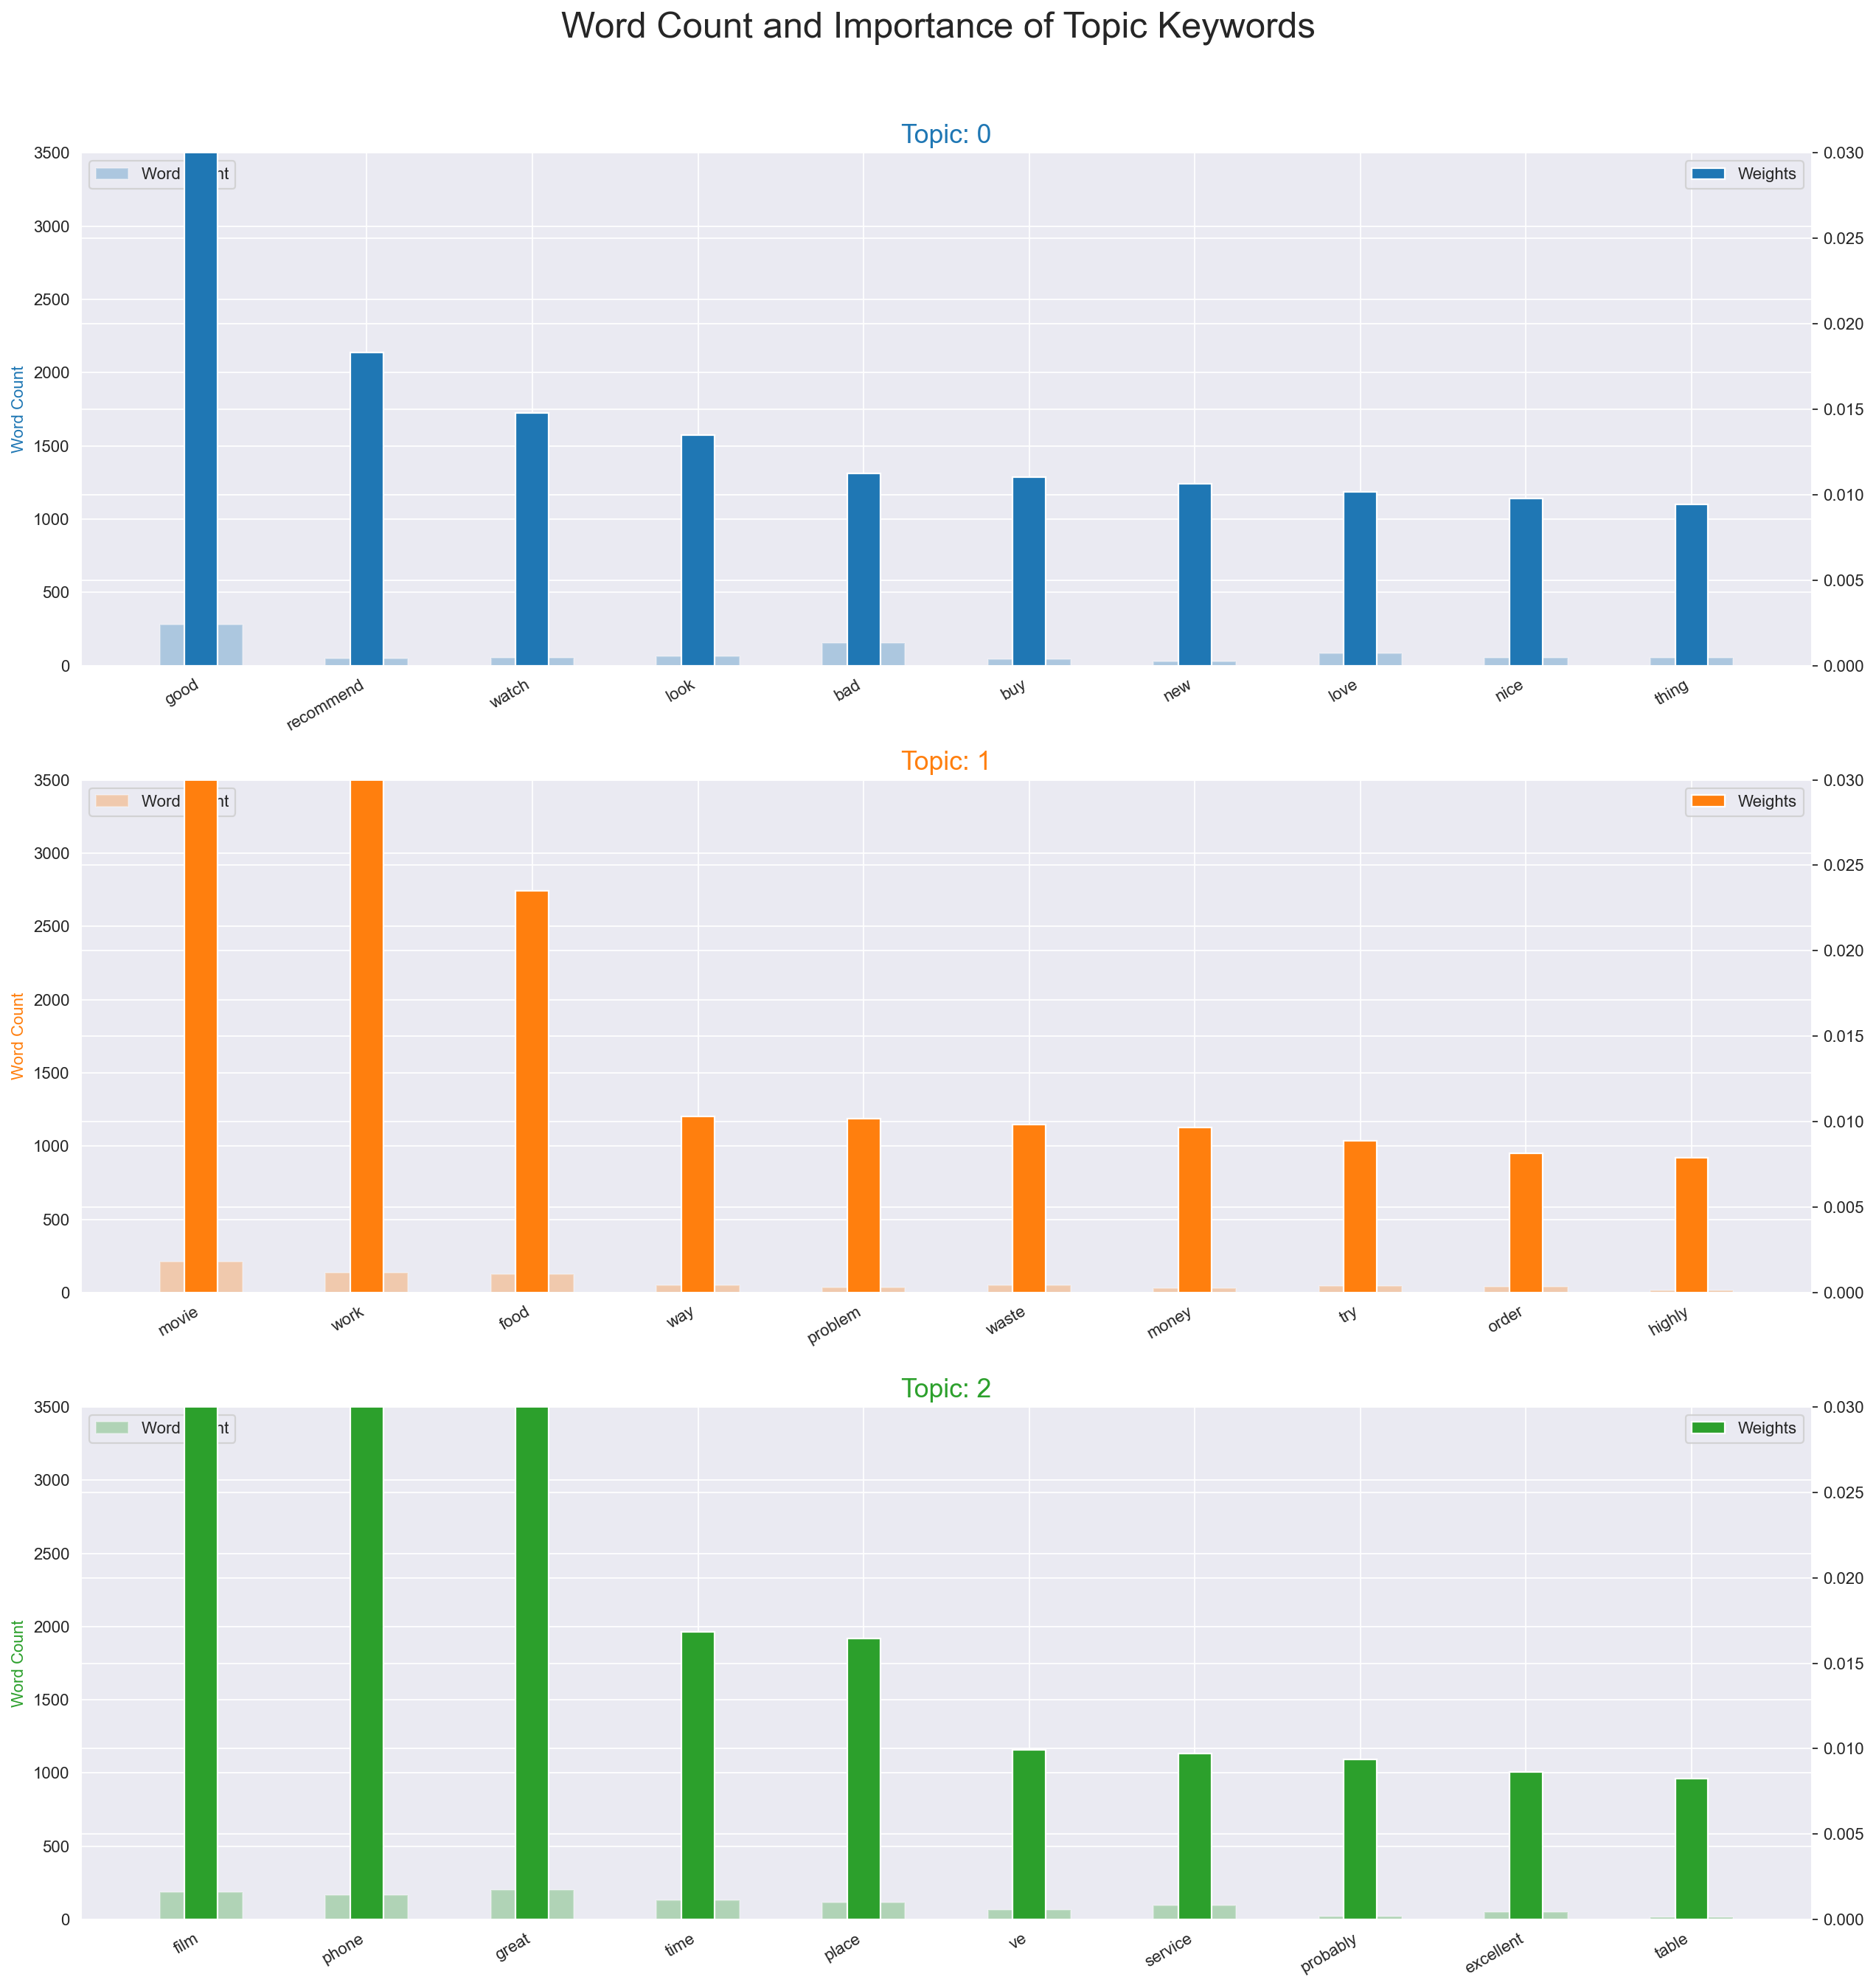

In [147]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(16, 16), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.5, alpha=0.3,
           label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.2,
                label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030)
    ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
    ax.legend(loc='upper left');
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)

#### Sentence Chart Colored by Topic
Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [148]:
from matplotlib.patches import Rectangle

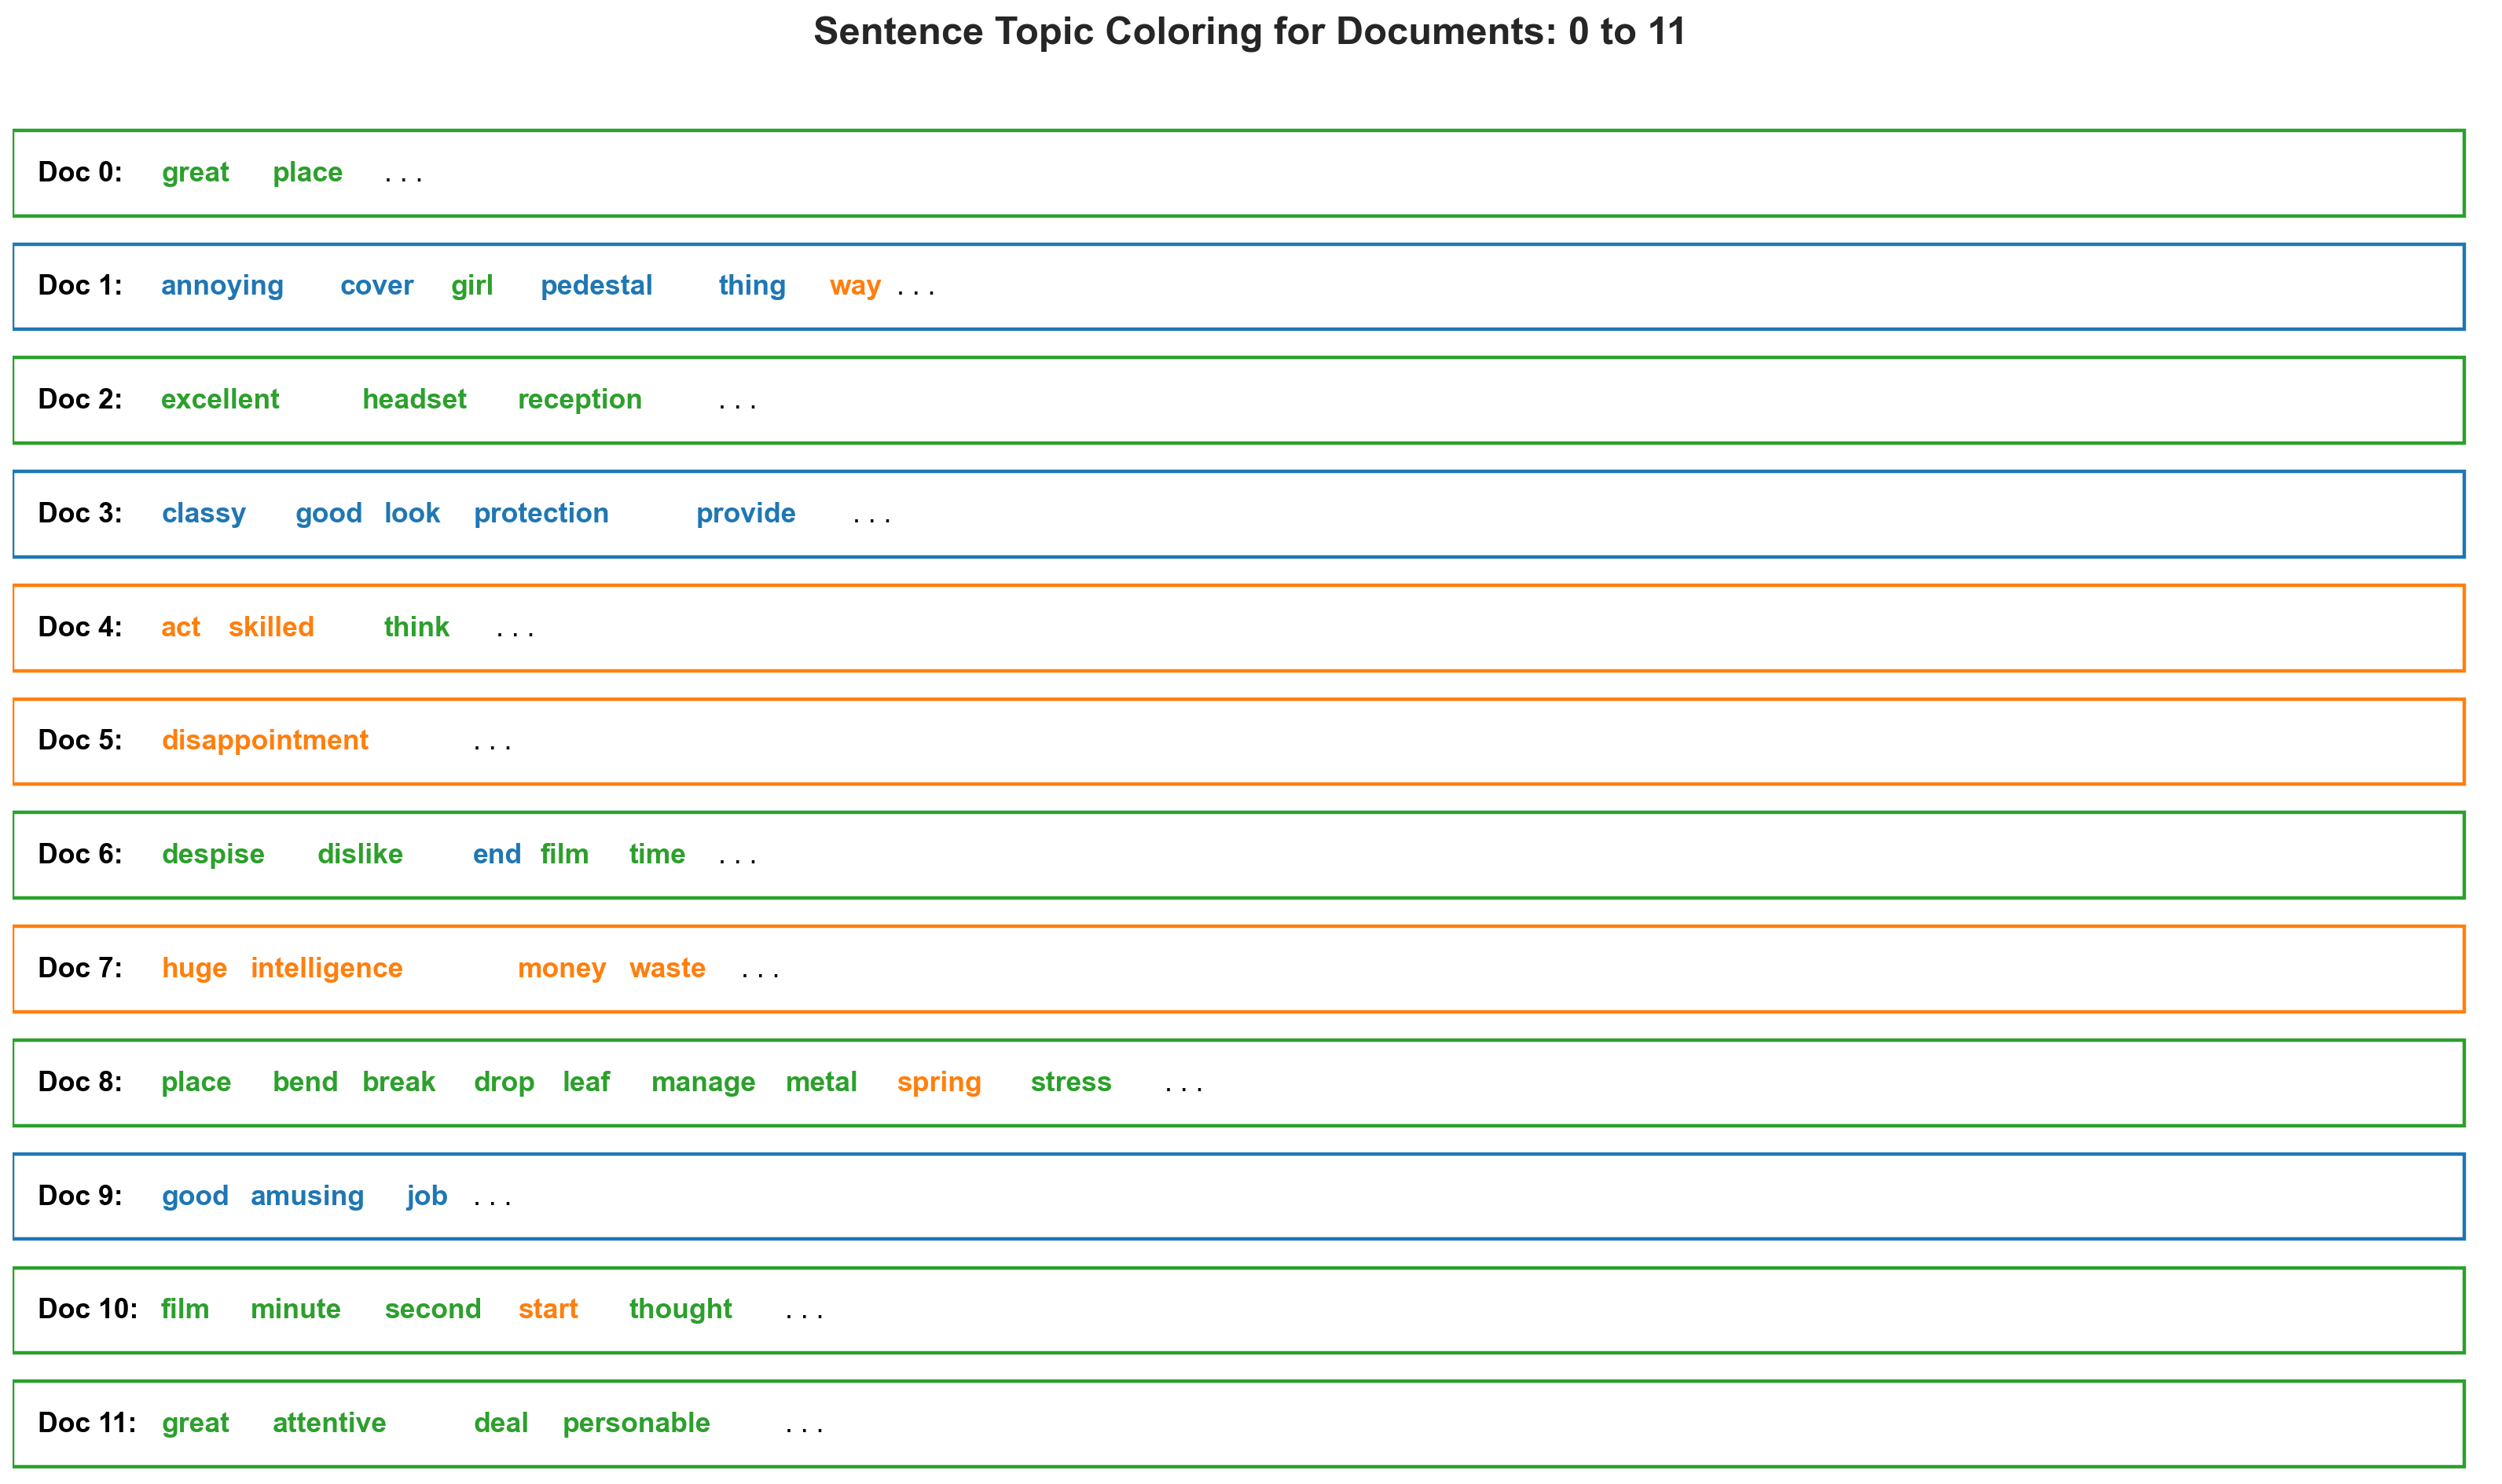

In [149]:
def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end - start, 1, figsize=(20, (end - start) * 0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i - 1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i - 1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end - 2), fontsize=22, y=0.95,
                 fontweight=700)
    plt.tight_layout()
    plt.show()


sentences_chart()

In [150]:
dominant_topics, topic_percentages = dmh.topics_per_document(model=lda_model, corpus=corpus, end=-1)

### What are the most discussed topics in the documents?
Let’s compute the total number of documents attributed to each topic.

In [151]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [152]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                   for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0, inplace=True)

- The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
- The number of documents for each topic by summing up the actual weight contribution of each topic to respective documents.

Text(0.5, 1.0, 'Number of Documents by Topic Weightage')

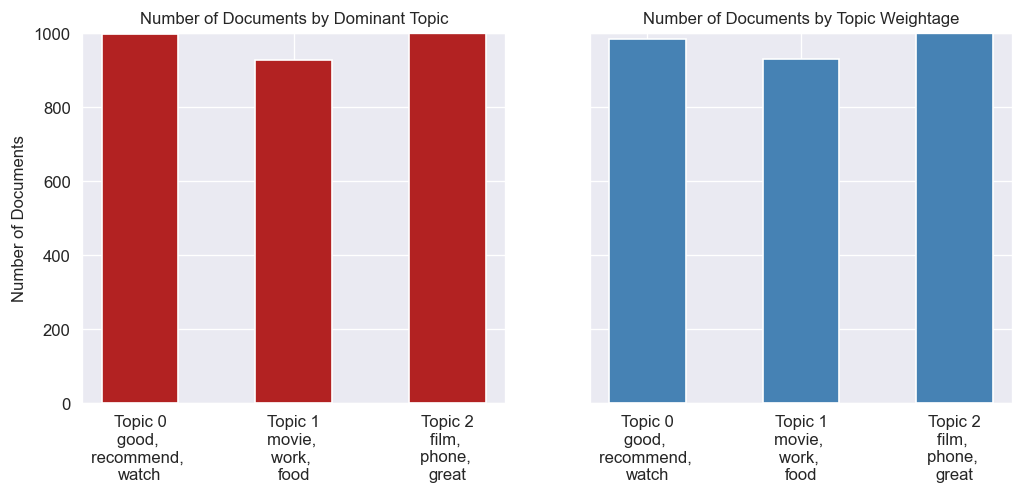

In [153]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(
    lambda x, pos: 'Topic ' + str(x) + '\n' + df_top3words.loc[df_top3words.topic_id == x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

###  t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [181]:
# Get topic weights and dominant topics
# --------------------------------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [182]:
# Get topic weights of each word in the corpus
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=1, init='pca', perplexity=30, n_iter=3000)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 3

TABLEAU_COLORS = {
    'tab:gray': '#7f7f7f',
    'tab:orange': '#ff7f0e',
    'tab:red': '#d62728',
    'tab:pink': '#e377c2'
}
mycolors = np.array([color for name, color in TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[topic_num])
show(plot)

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2896 samples in 0.001s...
[t-SNE] Computed neighbors for 2896 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2896
[t-SNE] Computed conditional probabilities for sample 2000 / 2896
[t-SNE] Computed conditional probabilities for sample 2896 / 2896
[t-SNE] Mean sigma: 0.000260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.045799
[t-SNE] KL divergence after 3000 iterations: 0.316006


/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


Loading BokehJS ...

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


In [183]:
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.215112 -0.076163       1        1  36.709660
0      0.176880 -0.139170       2        1  32.460243
1      0.038233  0.215333       3        1  30.830097, topic_info=           Term        Freq       Total Category  logprob  loglift
12         good  209.000000  209.000000  Default  30.0000  30.0000
149       movie  178.000000  178.000000  Default  29.0000  29.0000
23         film  193.000000  193.000000  Default  28.0000  28.0000
101       phone  186.000000  186.000000  Default  27.0000  27.0000
0         great  168.000000  168.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
228        meat   22.867359   23.902436   Topic3  -5.2244   1.1324
397   seriously   21.582796   22.536974   Topic3  -5.2822   1.1334
1418      thank   22.117563   24.386312   Topic3  -5.2577   1.0790
1506      twice   23.040127   26.248165   Topic3  -5.2168   1.0463
545         old   20.557865   24.335026   Topic3  -5.3308   1.0080

[138 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
16        3  0.982613    act
46        2  0.978229  avoid
59        1  0.984655   away
293       3  0.961074  awful
175       2  0.982372    bad
...     ...       ...    ...
7         3  0.991011    way
240       1  0.977204   wear
240       2  0.037585   wear
86        3  0.993200   work
876       1  0.986288  worth

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

#### Exercise 15

In [184]:
import math

term_frequencies_log = [math.log(i) for i in word_df.frequency]

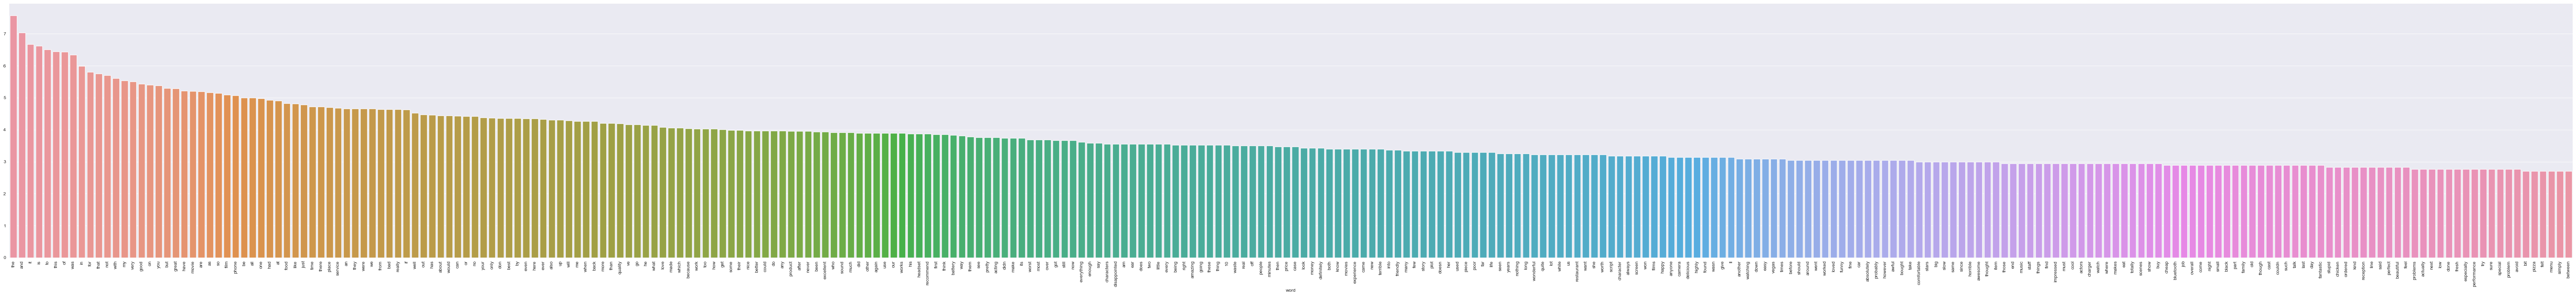

In [185]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=word_df.word[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(word_df.word[:300], rotation=90);

Estimating distributions parameters...
halfnorm (197.99999999999966, 521.008599455658)
halfcauchy (197.99999999997777, 137.8105324853595)


/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


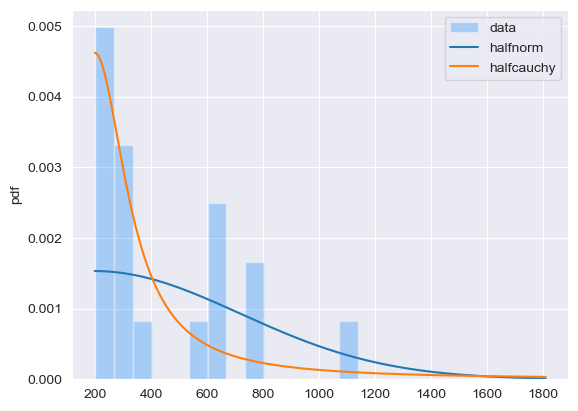

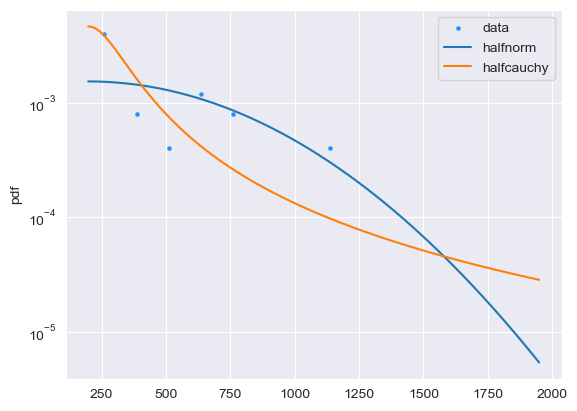

{'halfnorm': (197.99999999999966, 521.008599455658),
 'halfcauchy': (197.99999999997777, 137.8105324853595)}

In [186]:
import longtail

longtail.plot(display.frequency)

### 5.6 Discretization and Binarization

In [187]:
# generate the binarization
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

X[0:9]

text  \
0                                                                                It's a great place and I highly recommend it.   
1                      The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pedestal.     
2                                                                             The reception through this headset is excellent.   
3                                                                              Provides good protection and looks classy, too.   
4                                                                                      But I thought his acting was skilled.     
5                                                                                                            A Disappointment.   
6                                                         By the time the film ended, I not only disliked it, I despised it.     
7                                                  All in all its an insult to one's intelligence and a huge waste of money.     
8  While I managed to bend the leaf spring back in place, the metal now has enough stress that it will break on the next drop.   

   category category_name label  \
0         3          yelp     1   
1         2          imdb     0   
2         1        amazon     1   
3         1        amazon     1   
4         2          imdb     1   
5         1        amazon     0   
6         2          imdb     0   
7         2          imdb     0   
8         1        amazon     0   

                                                                                                                                                    unigrams  \
0                                                                                                [It, 's, a, great, place, and, I, highly, recommend, it, .]   
1                             [The, most, annoying, thing, about, 'Cover, Girl, ', is, the, way, in, which, Rita, Hayworth, is, put, up, on, a, pedestal, .]   
2                                                                                                 [The, reception, through, this, headset, is, excellent, .]   
3                                                                                                [Provides, good, protection, and, looks, classy, ,, too, .]   
4                                                                                                            [But, I, thought, his, acting, was, skilled, .]   
5                                                                                                                                     [A, Disappointment, .]   
6                                                                    [By, the, time, the, film, ended, ,, I, not, only, disliked, it, ,, I, despised, it, .]   
7                                                              [All, in, all, its, an, insult, to, one, 's, intelligence, and, a, huge, waste, of, money, .]   
8  [While, I, managed, to, bend, the, leaf, spring, back, in, place, ,, the, metal, now, has, enough, stress, that, it, will, break, on, the, next, drop, .]   

  bin_category bin_category_name  
0    [0, 0, 1]         [0, 0, 1]  
1    [0, 1, 0]         [0, 1, 0]  
2    [1, 0, 0]         [1, 0, 0]  
3    [1, 0, 0]         [1, 0, 0]  
4    [0, 1, 0]         [0, 1, 0]  
5    [1, 0, 0]         [1, 0, 0]  
6    [0, 1, 0]         [0, 1, 0]  
7    [0, 1, 0]         [0, 1, 0]  
8    [1, 0, 0]         [1, 0, 0]

In [188]:
# 1. fit a target attribute
# 2. transform to list
# 3. store to the new column
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  \
0                                                                                It's a great place and I highly recommend it.   
1                      The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pedestal.     
2                                                                             The reception through this headset is excellent.   
3                                                                              Provides good protection and looks classy, too.   
4                                                                                      But I thought his acting was skilled.     
5                                                                                                            A Disappointment.   
6                                                         By the time the film ended, I not only disliked it, I despised it.     
7                                                  All in all its an insult to one's intelligence and a huge waste of money.     
8  While I managed to bend the leaf spring back in place, the metal now has enough stress that it will break on the next drop.   

   category category_name label  \
0         3          yelp     1   
1         2          imdb     0   
2         1        amazon     1   
3         1        amazon     1   
4         2          imdb     1   
5         1        amazon     0   
6         2          imdb     0   
7         2          imdb     0   
8         1        amazon     0   

                                                                                                                                                    unigrams  \
0                                                                                                [It, 's, a, great, place, and, I, highly, recommend, it, .]   
1                             [The, most, annoying, thing, about, 'Cover, Girl, ', is, the, way, in, which, Rita, Hayworth, is, put, up, on, a, pedestal, .]   
2                                                                                                 [The, reception, through, this, headset, is, excellent, .]   
3                                                                                                [Provides, good, protection, and, looks, classy, ,, too, .]   
4                                                                                                            [But, I, thought, his, acting, was, skilled, .]   
5                                                                                                                                     [A, Disappointment, .]   
6                                                                    [By, the, time, the, film, ended, ,, I, not, only, disliked, it, ,, I, despised, it, .]   
7                                                              [All, in, all, its, an, insult, to, one, 's, intelligence, and, a, huge, waste, of, money, .]   
8  [While, I, managed, to, bend, the, leaf, spring, back, in, place, ,, the, metal, now, has, enough, stress, that, it, will, break, on, the, next, drop, .]   

  bin_category bin_category_name  
0    [0, 0, 1]         [0, 0, 1]  
1    [0, 1, 0]         [0, 1, 0]  
2    [1, 0, 0]         [1, 0, 0]  
3    [1, 0, 0]         [1, 0, 0]  
4    [0, 1, 0]         [0, 1, 0]  
5    [1, 0, 0]         [1, 0, 0]  
6    [0, 1, 0]         [0, 1, 0]  
7    [0, 1, 0]         [0, 1, 0]  
8    [1, 0, 0]         [1, 0, 0]

In [189]:
# We retrieve 2 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[10]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [190]:
print(document_to_transform_1)
print("-" * 100)
print(document_to_transform_2)
print("-" * 100)
print(document_to_transform_3)

['I believe every one should see this movie as I think few people outside of South Africa understand its past and what is being attempted in the Truth and Reconciliation process.  ']
----------------------------------------------------------------------------------------------------
['About ten minutes into this film I started having second thoughts.  ']
----------------------------------------------------------------------------------------------------
['An hour and a half I wish I could bring back.  ']


In [191]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for absence, 1 for presence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [192]:
len(document_vector_count_3.todense().tolist()[0])

4108

In [193]:
document_vector_count_1_bin.todense(), document_vector_count_2_bin.todense(), document_vector_count_3_bin.todense()

(matrix([[0, 0, 0, ..., 0, 0, 0]]),
 matrix([[0, 0, 0, ..., 0, 0, 0]]),
 matrix([[0, 0, 0, ..., 0, 0, 0]]))

In [194]:
print(count_vect.get_feature_names_out()[0:10])

['00' '10' '11' '12' '13' '15' '15g' '15pm' '17' '18']


In [195]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" % {"x": cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" % {"x": cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" % {"x": cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" % {"x": cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" % {"x": cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" % {"x": cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.056796
Cosine Similarity using count bw 1 and 3: 0.127000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Assignment 3
1. Read new dataset (sentences + scores)
2. Generate TF-IDF features
3. Implement Naive Bayes classifier

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [197]:
# We need two set of data 1). train 2). test. Both data sets separated into X(input) and Y(Output)
# Data needs to be split into df(will be cast into X later) and Y
df_train, df_test, Ytrain, Ytest = train_test_split(X.text, X.label, test_size=0.33)

In [198]:
# Fit the data into the TF-TDF model
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain1 = tfidf.fit_transform(df_train)
Xtest1 = tfidf.transform(df_test)

In [199]:
# Declare shared variables
labels = ["True", "False"]
param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
params_NB = {'var_smoothing': np.logspace(0, -9, num=10)}
train_result = []

#### TD-IDF features with Naive Baye - Multinomial

feature        model  train score  test score              best index  \
0  TD-IDF  Multinomial     0.958228    0.814096  MultinomialNB(alpha=1)   

   training time(s)  
0          0.388461

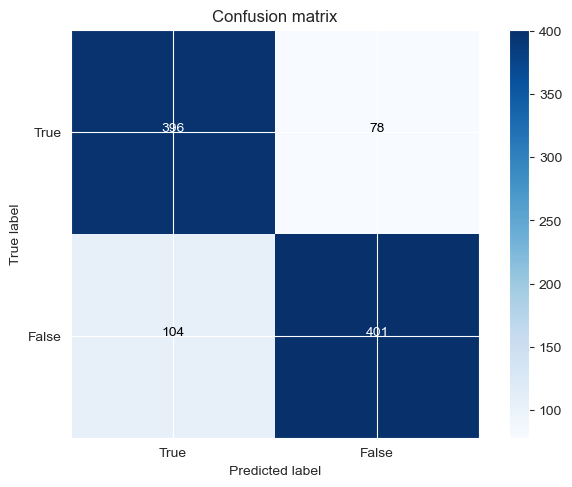

In [200]:
# Fit the X and Y into multinomial naive baye model then check the training scores.
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

clf = GridSearchCV(model, param, scoring='accuracy', cv=10, return_train_score=True)
start = time.time()
clf.fit(Xtrain1, Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = clf.predict(Xtest1)
score = accuracy_score(Ytest, Ypredict, normalize=False)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {
    'feature': 'TD-IDF',
    'model': 'Multinomial',
    'train score': clf.score(Xtrain1, Ytrain).real,
    'test score': clf.score(Xtest1, Ytest).real,
    'best index': clf.best_estimator_,
    "training time(s)": execute_time
}

train_result.append(result_dict)
pd.DataFrame([result_dict])

#### TD-IDF features with Naive Baye - Bernoulli

feature      model  train score  test score            best index  \
0  TD-IDF  Bernoulli     0.987901    0.893036  BernoulliNB(alpha=1)   

   training time(s)  
0           0.46602

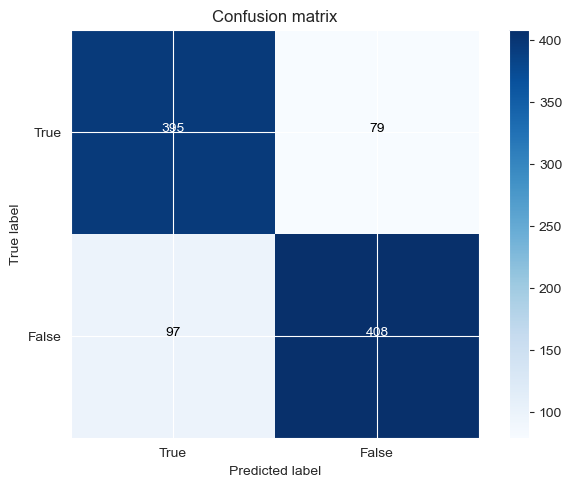

In [201]:
# Fit the X and Y into Bernoulli naive baye model then check the training scores.
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB(binarize=0.0)

clf_bnb = GridSearchCV(bnb1, param, scoring='roc_auc', cv=10, return_train_score=True)
start = time.time()
clf_bnb.fit(Xtrain1, Ytrain)
end = time.time()
execute_time = end - start
# Predict
Ypredict = clf_bnb.predict(Xtest1)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)
result_dict = {'feature': 'TD-IDF',
               'model': 'Bernoulli',
               'train score': clf_bnb.score(Xtrain1, Ytrain).real,
               'test score': clf_bnb.score(Xtest1, Ytest).real,
               'best index': clf_bnb.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

#### TD-IDF features with Naive Baye - GaussianNB

feature     model  train score  test score                     best index  \
0  TD-IDF  Gaussian     0.963764    0.772217  GaussianNB(var_smoothing=0.1)   

   training time(s)  
0          5.036303

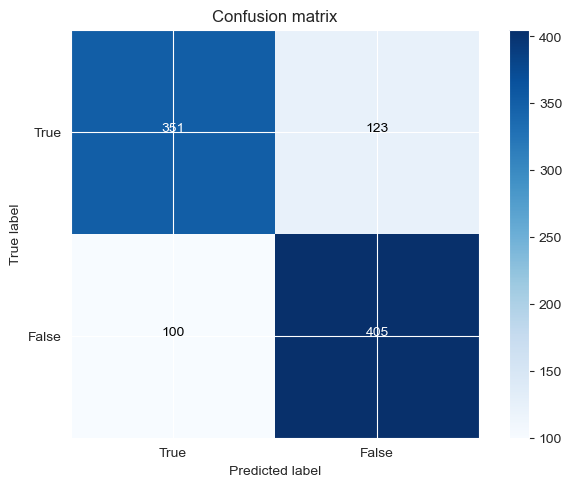

In [202]:
# Fit the X and Y into Gaussian naive baye model then check the training scores.
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

# gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=10)

nb2 = GridSearchCV(GaussianNB(), cv=skf, param_grid=params_NB)

start = time.time()
nb2.fit(Xtrain1.toarray(), Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = nb2.predict(Xtest1.toarray())

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'TD-IDF',
               'model': 'Gaussian',
               'train score': nb2.score(Xtrain1.toarray(), Ytrain).real,
               'test score': nb2.score(Xtest1.toarray(), Ytest).real,
               'best index': nb2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

### Counter Vectorizer

In [203]:
Xtrain2 = count_vect.fit_transform(df_train)
Xtest2 = count_vect.transform(df_test)

#### Counter Vectorizer features with Naive Baye - Multinomial

feature        model  train score  test score  \
0  Counter Vectorizer  Multinomial     0.963261    0.805924   

               best index  training time(s)  
0  MultinomialNB(alpha=1)           0.33126

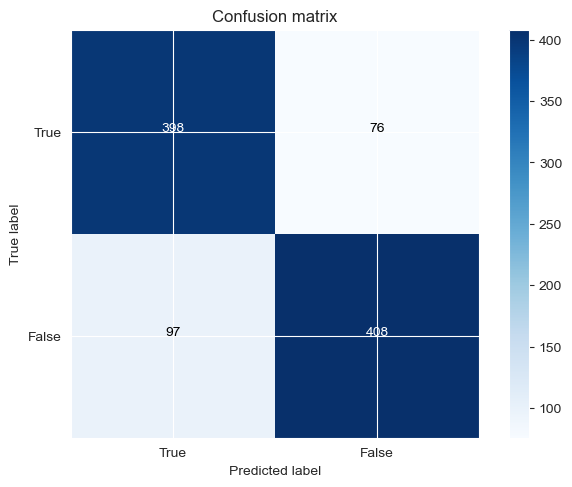

In [204]:
model2 = MultinomialNB()
clf2 = GridSearchCV(model2, param, scoring='accuracy', cv=10, return_train_score=True)

start = time.time()
clf2.fit(Xtrain2, Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = clf2.predict(Xtest2)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'Counter Vectorizer',
               'model': 'Multinomial',
               'train score': clf2.score(Xtrain1, Ytrain).real,
               'test score': clf2.score(Xtest1, Ytest).real,
               'best index': clf2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

#### Counter Vectorizer features with Naive Baye - Bernoulli

---------- BernoulliNB ----------
train score: 0.9562154001006542
test score: 0.8202247191011236


feature      model  train score  test score  \
0  Counter Vectorizer  Bernoulli     0.987901    0.893036   

             best index  training time(s)  
0  BernoulliNB(alpha=1)          0.467908

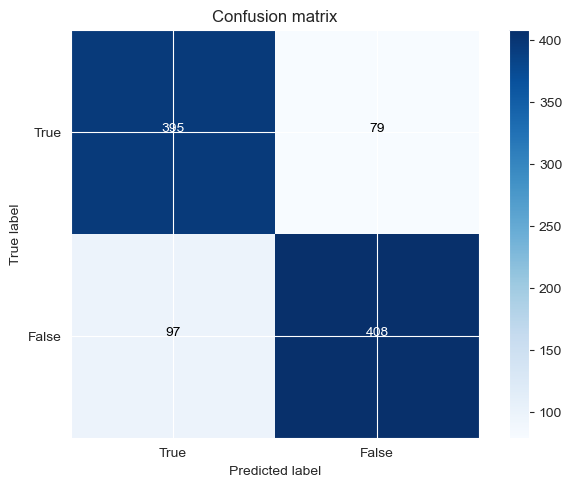

In [205]:
bnb2 = BernoulliNB(binarize=0.0)
bnb2.fit(Xtrain2, Ytrain)

print("-" * 10 + " BernoulliNB " + "-" * 10)
print("train score:", bnb2.score(Xtrain2, Ytrain))
print("test score:", bnb2.score(Xtest2, Ytest))

# Fit the X and Y into Bernoulli naive baye model then check the training scores.
bnb2 = BernoulliNB(binarize=0.0)
clf_bnb2 = GridSearchCV(bnb2, param, scoring='roc_auc', cv=10, return_train_score=True)

# Fit
start = time.time()
clf_bnb2.fit(Xtrain2, Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = clf_bnb2.predict(Xtest2)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'Counter Vectorizer',
               'model': 'Bernoulli',
               'train score': clf_bnb2.score(Xtrain2, Ytrain).real,
               'test score': clf_bnb2.score(Xtest2, Ytest).real,
               'best index': clf_bnb2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

#### Counter Vectorizer features with Naive Baye - Bernoulli

feature     model  train score  test score  \
0  Counter Vectorizer  Gaussian     0.924006    0.775281   

                       best index  training time(s)  
0  GaussianNB(var_smoothing=0.01)          5.796544

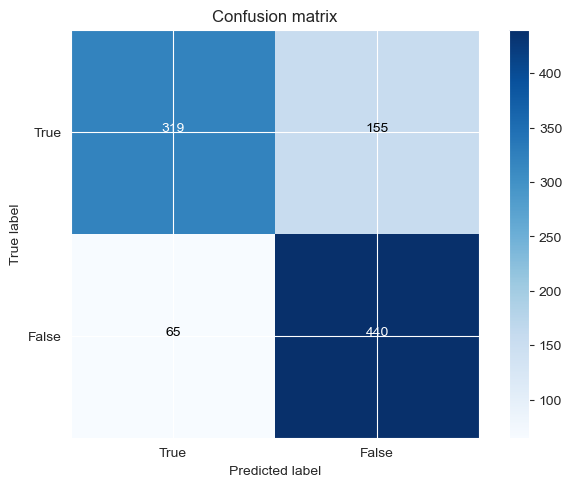

In [206]:
skf = StratifiedKFold(n_splits=10)

gnb2 = GridSearchCV(GaussianNB(), cv=skf, param_grid=params_NB)
start = time.time()
gnb2.fit(Xtrain2.toarray(), Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = gnb2.predict(Xtest2.toarray())

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'Counter Vectorizer',
               'model': 'Gaussian',
               'train score': gnb2.score(Xtrain2.toarray(), Ytrain).real,
               'test score': gnb2.score(Xtest2.toarray(), Ytest).real,
               'best index': gnb2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

In [207]:
result_df = pd.DataFrame(train_result)
result_df

feature        model  train score  test score  \
0              TD-IDF  Multinomial     0.958228    0.814096   
1              TD-IDF    Bernoulli     0.987901    0.893036   
2              TD-IDF     Gaussian     0.963764    0.772217   
3  Counter Vectorizer  Multinomial     0.963261    0.805924   
4  Counter Vectorizer    Bernoulli     0.987901    0.893036   
5  Counter Vectorizer     Gaussian     0.924006    0.775281   

                       best index  training time(s)  
0          MultinomialNB(alpha=1)          0.388461  
1            BernoulliNB(alpha=1)          0.466020  
2   GaussianNB(var_smoothing=0.1)          5.036303  
3          MultinomialNB(alpha=1)          0.331260  
4            BernoulliNB(alpha=1)          0.467908  
5  GaussianNB(var_smoothing=0.01)          5.796544

#### Summary
From above training results the features, the Bernoulli model is the most efficient one. It archives the best score among three models for features from both TF-IDF and counter vectorizer. Subsequently, Multimonial model executes fastest with less than 0.4s for both features sets and performs score higher than 0.8 just that less than Bernoulli model just a little bit. Last but not least, the Gaussian model  gain just about 0.78 for the Counter Vectorizer but still archive relatively high score for the TD-IDF.
To sum up, the most efficient model is Bernoulli model and the least is Gaussian model.

##### But why is that?
- First, multinomial naive bayes, it gains the highest score because the model can answer the following question, if the feature vectors have `n` elements and each of them can assume k different values with probability p(k), what is the probability of k?  With the formula of multinomial naive bayes it can calculate the probabilistic value and determine the best one.
- Second, Bernoulli naive bayes, it assumes just only two values(like 0, 1) unlike the multimonial that considers with multiple values.
- Finally, Gaussian Naive Bayes, it just produces a distribution(gaussian distribution) from the continuous values. There is no comparison for each value just consider the overall distribution that is the reason why it archives the lowest score.

##### Overall
The score from TF-IDF and Conuter Vectorizer features fit the model relatively equally. Bernoulli model gives the same score for the multinomial and gaussian model just less than each other with small differences.


---

### Assignment 4:
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are something that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficient parts you noticed? How can you improve the Data preprocessing for these specific datasets?

1. Hyperparameters
Each model has different hyperparameters, from the previous assignment we can see that `alpha` is used in `Multinomial` and `Bernoulli` model and smoothing value is used in Gaussian model. But this just most significant values, if we can find other significant parameters and make combination to get the highest accuracy, like `binarize` for Bernoulli model and  `prior probabilities of the classes` for the multinomial model.

2. Other feature selection
There is an upgraded version of TD-IDF called "BM25", which update equation when creating features. It might improve the performance of the model.

3. Collect more data
The more dataset the more robust of the model. But also need to keep the classes of the training data to avoid overfitting and underfitting problems.

4. Monitor more meaningful evaluations
The model can be evaluated its efficiency by controlling the scores of recall, f1, precision and other evaluation or measurement methods like cosine similarity and minkowski distances.
